In [1]:
import pandas as pd
import snap
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import copy
import numpy as np
from prettytable import PrettyTable
import mpmath
import powerlaw
import utils
import random
import itertools

In [2]:
atp_matches_files = glob.glob("data_alt/atp_matches_[0-9]*.csv")
futures_files = glob.glob("data_alt/atp_matches_futures*.csv")
qual_files = glob.glob("data_alt/atp_matches_qual*.csv")

In [3]:
atp_df = utils.read_alt_files(atp_matches_files)
futures_df = utils.read_alt_files(futures_files)
qual_df = utils.read_alt_files(qual_files)

In [4]:
atp_df = atp_df[atp_df['year']!=2016]
futures_df = futures_df[futures_df['year']!=2016]
qual_df = qual_df[qual_df['year']!=2016]

In [5]:
atp_names = set(atp_df['winner_name'].unique()).union(set(atp_df['loser_name'].unique()))
print "", len(atp_names), " different atp players"
print "", atp_df.shape[0], " atp matches"

 5539  different atp players
 160636  atp matches


In [6]:
futures_names = set(futures_df['winner_name'].unique()).union(set(futures_df['loser_name'].unique()))
print "", len(futures_names), " different futures players"
print "", futures_df.shape[0], " futures matches"

 17708  different futures players
 355856  futures matches


In [7]:
quals_names = set(qual_df['winner_name'].unique()).union(set(qual_df['loser_name'].unique()))
print "", len(quals_names), " different quals players"
print "", qual_df.shape[0], " quals matches"

 5662  different quals players
 117978  quals matches


In [8]:
df = pd.concat([atp_df, qual_df, futures_df], ignore_index=True)

In [9]:
total_names = set(df['winner_name']).union(set(df['loser_name']))
print "", len(total_names), " total players"
print "", df.shape[0], " total matches"

 20904  total players
 634470  total matches


In [11]:
names_df = pd.DataFrame()
names_df['id'] = range(len(total_names))
names_df['name'] = total_names


In [12]:
df['winner_id'] = df.merge(names_df,'left',left_on='winner_name', right_on='name')['id']
df['loser_id'] = df.merge(names_df,'left',left_on='loser_name', right_on='name')['id']

qual_df['winner_id'] = qual_df.merge(names_df,'left',left_on='winner_name', right_on='name')['id']
qual_df['loser_id'] = qual_df.merge(names_df,'left',left_on='loser_name', right_on='name')['id']

atp_df['winner_id'] = atp_df.merge(names_df,'left',left_on='winner_name', right_on='name')['id']
atp_df['loser_id'] = atp_df.merge(names_df,'left',left_on='loser_name', right_on='name')['id']

futures_df['winner_id'] = futures_df.merge(names_df,'left',left_on='winner_name', right_on='name')['id']
futures_df['loser_id'] = futures_df.merge(names_df,'left',left_on='loser_name', right_on='name')['id']

In [71]:
atpG = utils.get_graph(atp_df)    
qualG = utils.get_graph(qual_df)    
fG = utils.get_graph(futures_df) 
totalG = utils.get_graph(df)
    

In [72]:
atp_deg_counts, atp_degs, atp_cdf, atp_ccdf, atp_pdf = utils.get_dists(atpG)
atp_deg_data = utils.get_deg_data(atpG)
    
qual_deg_counts, qual_degs, qual_cdf, qual_ccdf, qual_pdf = utils.get_dists(qualG)
qual_deg_data = utils.get_deg_data(qualG)
    
f_deg_counts, f_degs, f_cdf, f_ccdf, f_pdf = utils.get_dists(fG)
f_deg_data = utils.get_deg_data(fG)
    
total_deg_counts, total_degs, total_cdf, total_ccdf, total_pdf = utils.get_dists(totalG)
total_deg_data = utils.get_deg_data(totalG)


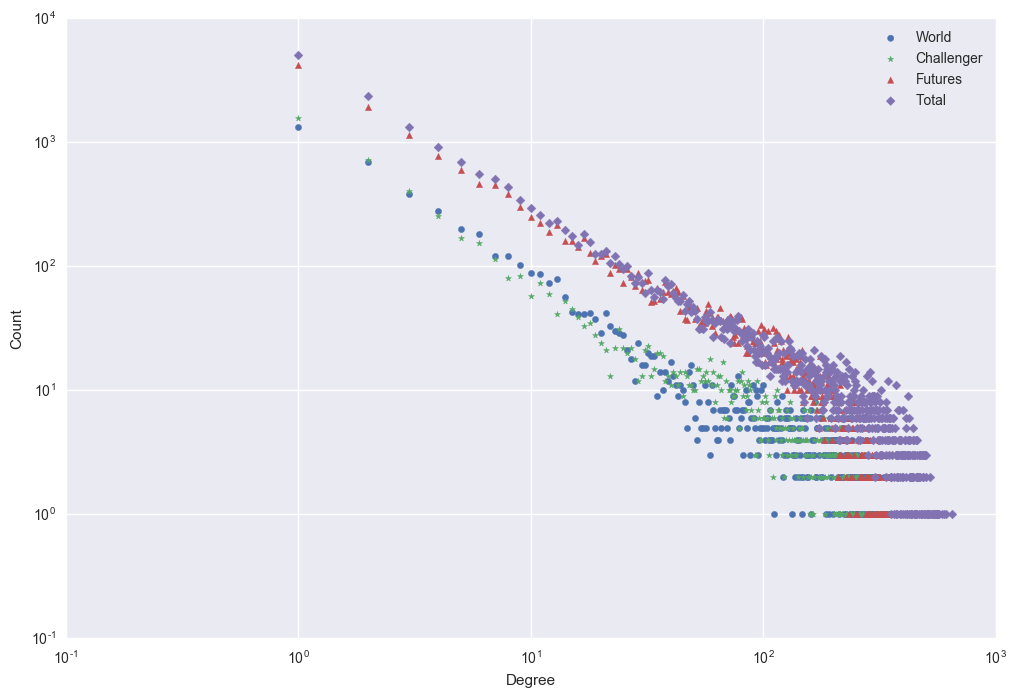

In [15]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.scatter(atp_degs, atp_deg_counts, marker='o', color=sns.color_palette()[0])
ax.scatter(qual_degs, qual_deg_counts, marker='*', color=sns.color_palette()[1])
ax.scatter(f_degs, f_deg_counts, marker='^', color=sns.color_palette()[2])
ax.scatter(total_degs, total_deg_counts, marker="D", color=sns.color_palette()[3])
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel('Count')
ax.set_xlabel('Degree')
ax.legend(['World', 'Challenger', 'Futures', 'Total'])
plt.show()


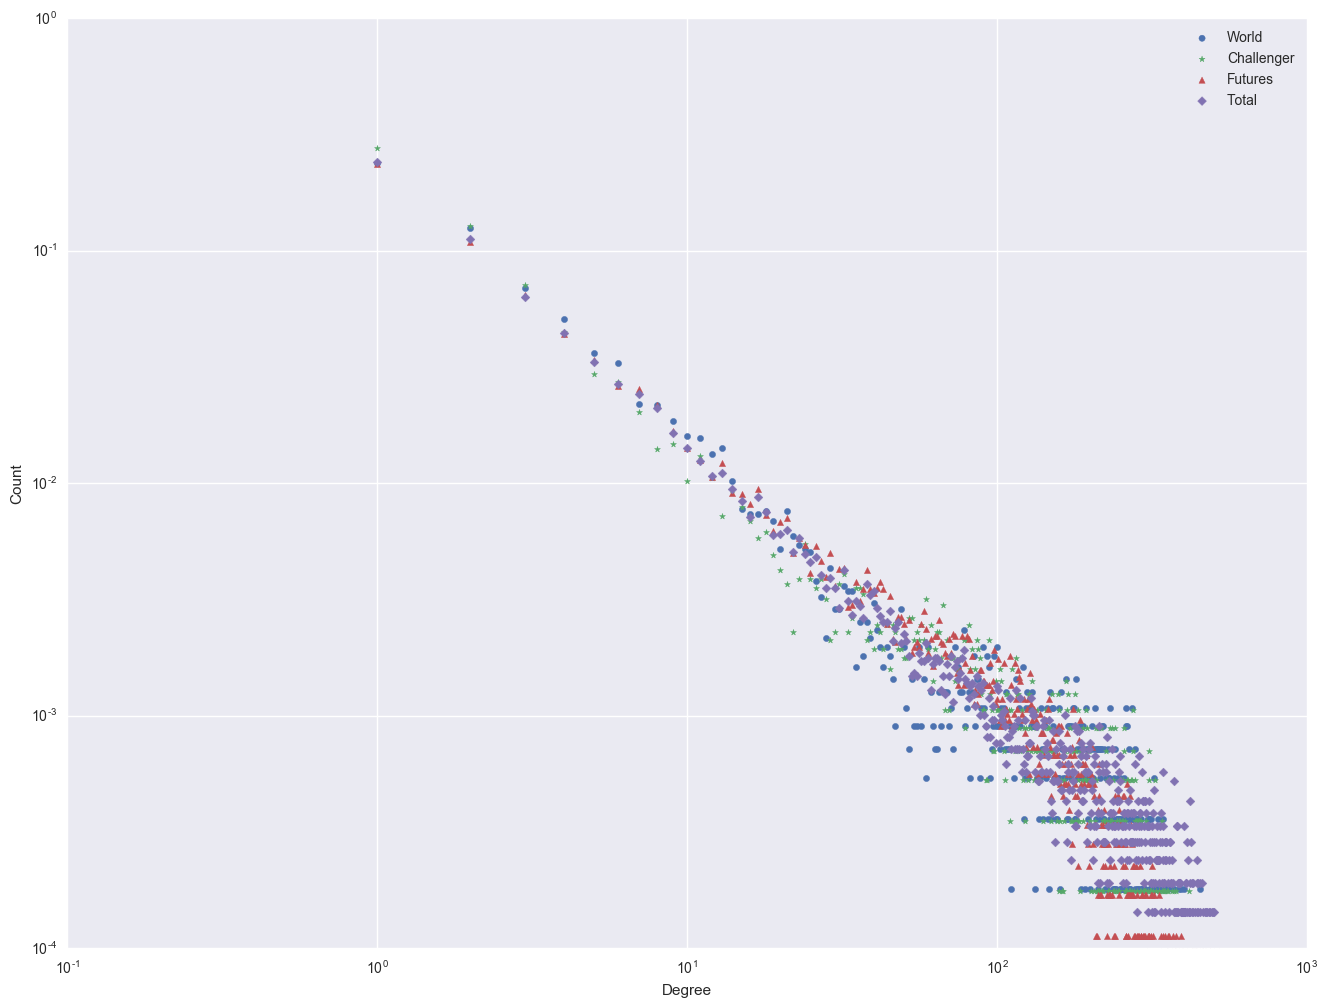

In [16]:
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)
ax.scatter(atp_degs, atp_pdf, marker='o', color=sns.color_palette()[0])
ax.scatter(qual_degs, qual_pdf, marker='*', color=sns.color_palette()[1])
ax.scatter(f_degs, f_pdf, marker='^', color=sns.color_palette()[2])
ax.scatter(total_degs, total_pdf, marker="D", color=sns.color_palette()[3])
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel('Count')
ax.set_xlabel('Degree')
ax.set_ylim(1e-4, 1e0)
ax.legend(['World', 'Challenger', 'Futures', 'Total'])
plt.show()

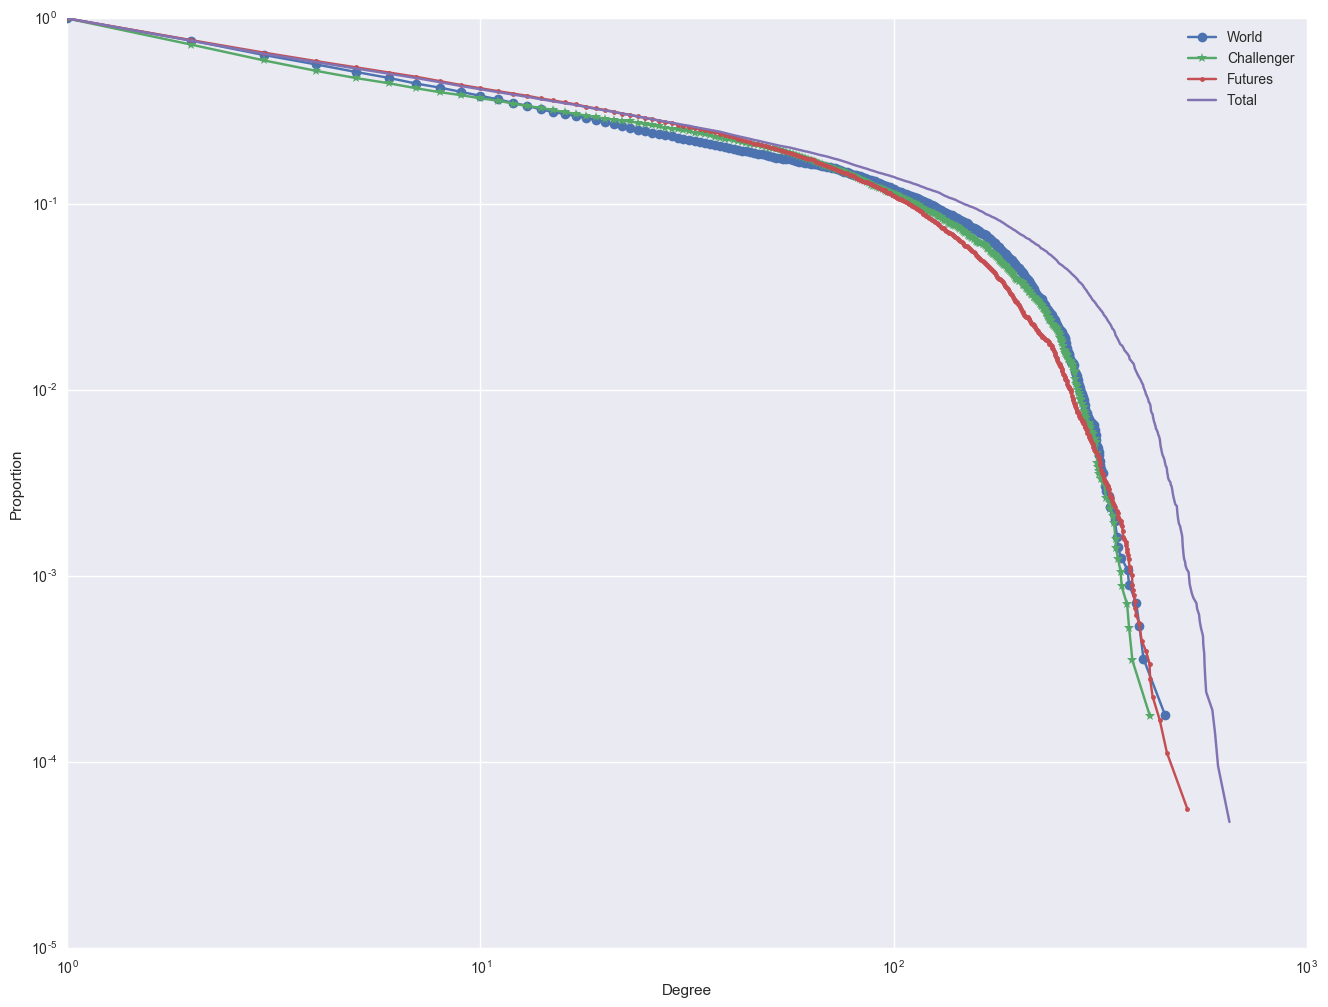

In [17]:
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)
ax.plot(atp_degs, atp_ccdf[:-1], marker='o')
ax.plot(qual_degs, qual_ccdf[:-1], marker='*')
ax.plot(f_degs, f_ccdf[:-1], marker='.')
ax.plot(total_degs, total_ccdf[:-1])
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel('Proportion')
ax.set_xlabel('Degree')
ax.legend(['World', 'Challenger', 'Futures', 'Total'])
plt.show()

In [18]:
atp_alphas, atp_lambdas, atp_xmins, atp_years = utils.get_fit_params_by_year(atp_df)
qual_alphas, qual_lambdas, qual_xmins, qual_years = utils.get_fit_params_by_year(qual_df)
f_alphas, f_lambdas, f_xmins, f_years = utils.get_fit_params_by_year(futures_df)
total_alphas, total_lambdas, total_xmins, total_years = utils.get_fit_params_by_year(df)

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Year 1973 fitting failed with ZeroDivisionError exception


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best min

Year 2008 fitting failed with ZeroDivisionError exception


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Year 2014 fitting failed with ZeroDivisionError exception


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Year 2002 fitting failed with ZeroDivisionError exception


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Year 2007 fitting failed with ZeroDivisionError exception


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best min

Year 2010 fitting failed with ZeroDivisionError exception


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Year 2013 fitting failed with ZeroDivisionError exception


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Year 1973 fitting failed with ZeroDivisionError exception


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Year 1991 fitting failed with ZeroDivisionError exception


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Year 1995 fitting failed with ZeroDivisionError exception


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Year 1999 fitting failed with ZeroDivisionError exception


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Year 2005 fitting failed with ZeroDivisionError exception


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Year 2009 fitting failed with ZeroDivisionError exception


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Year 2011 fitting failed with ZeroDivisionError exception


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


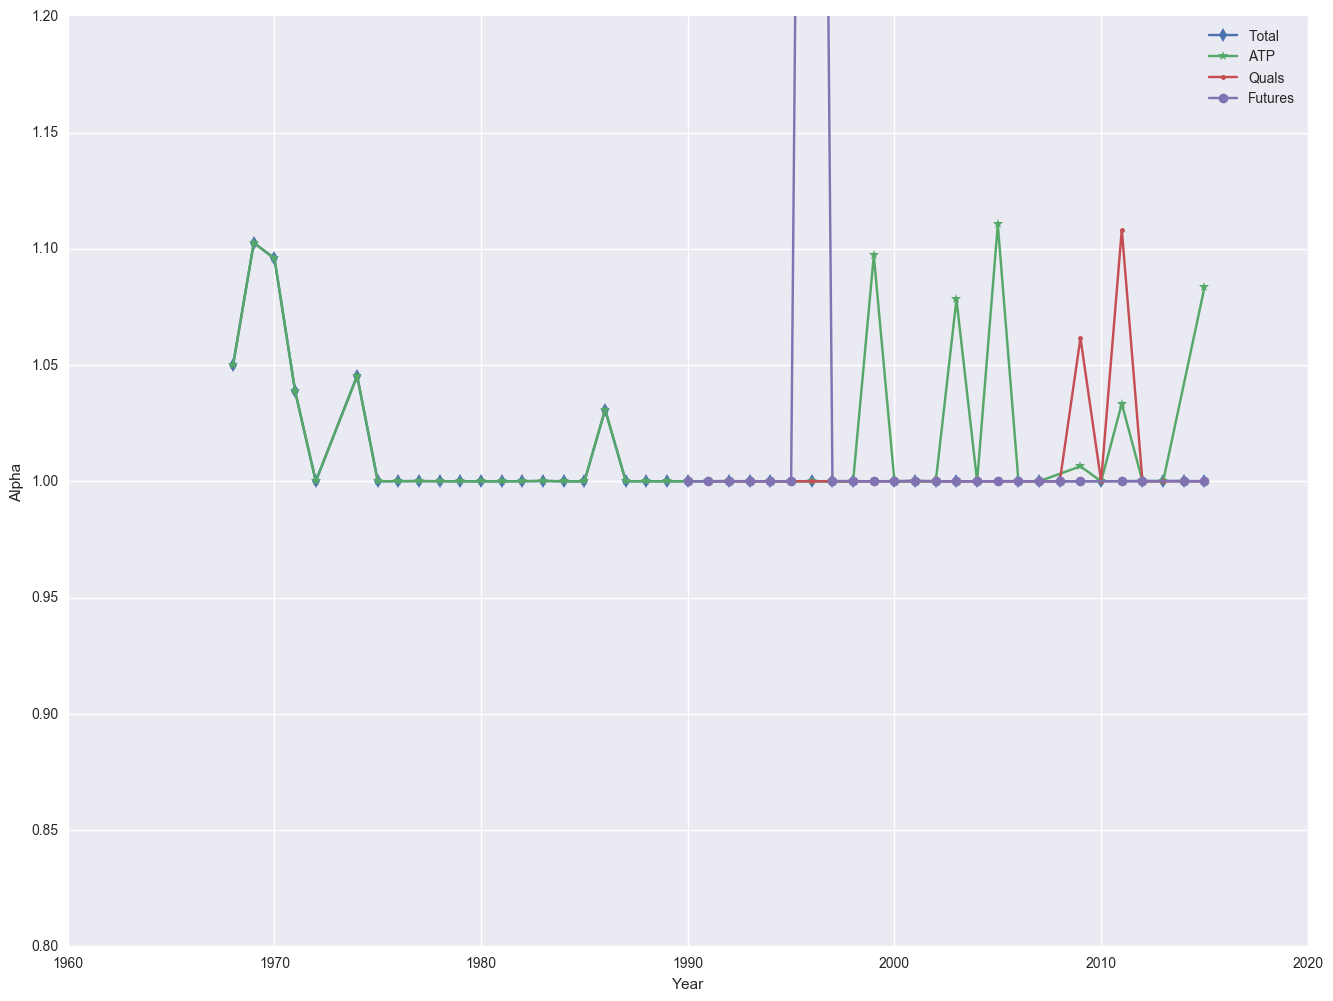

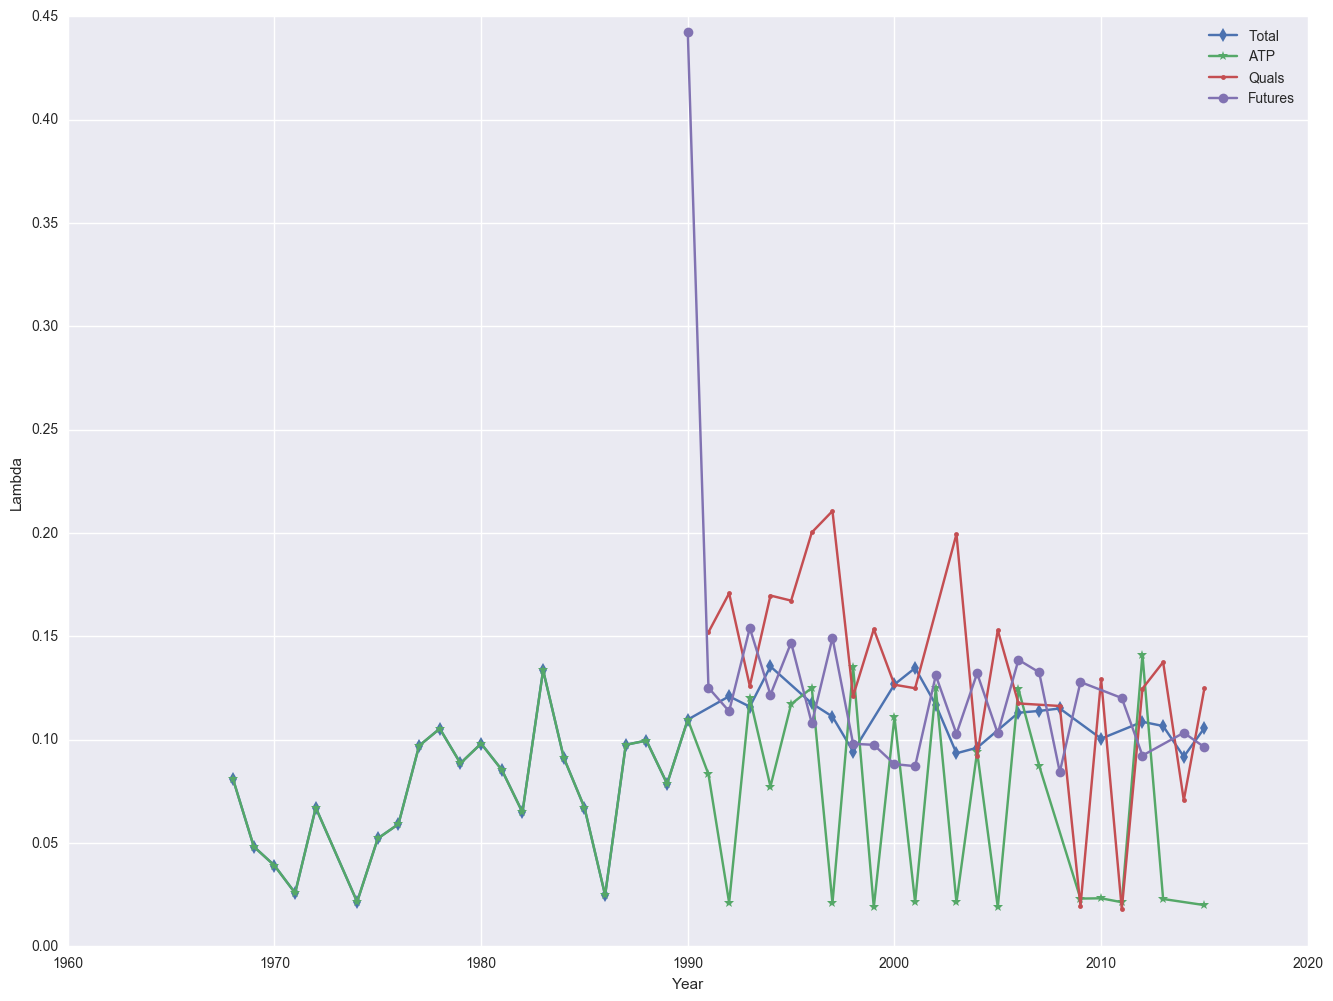

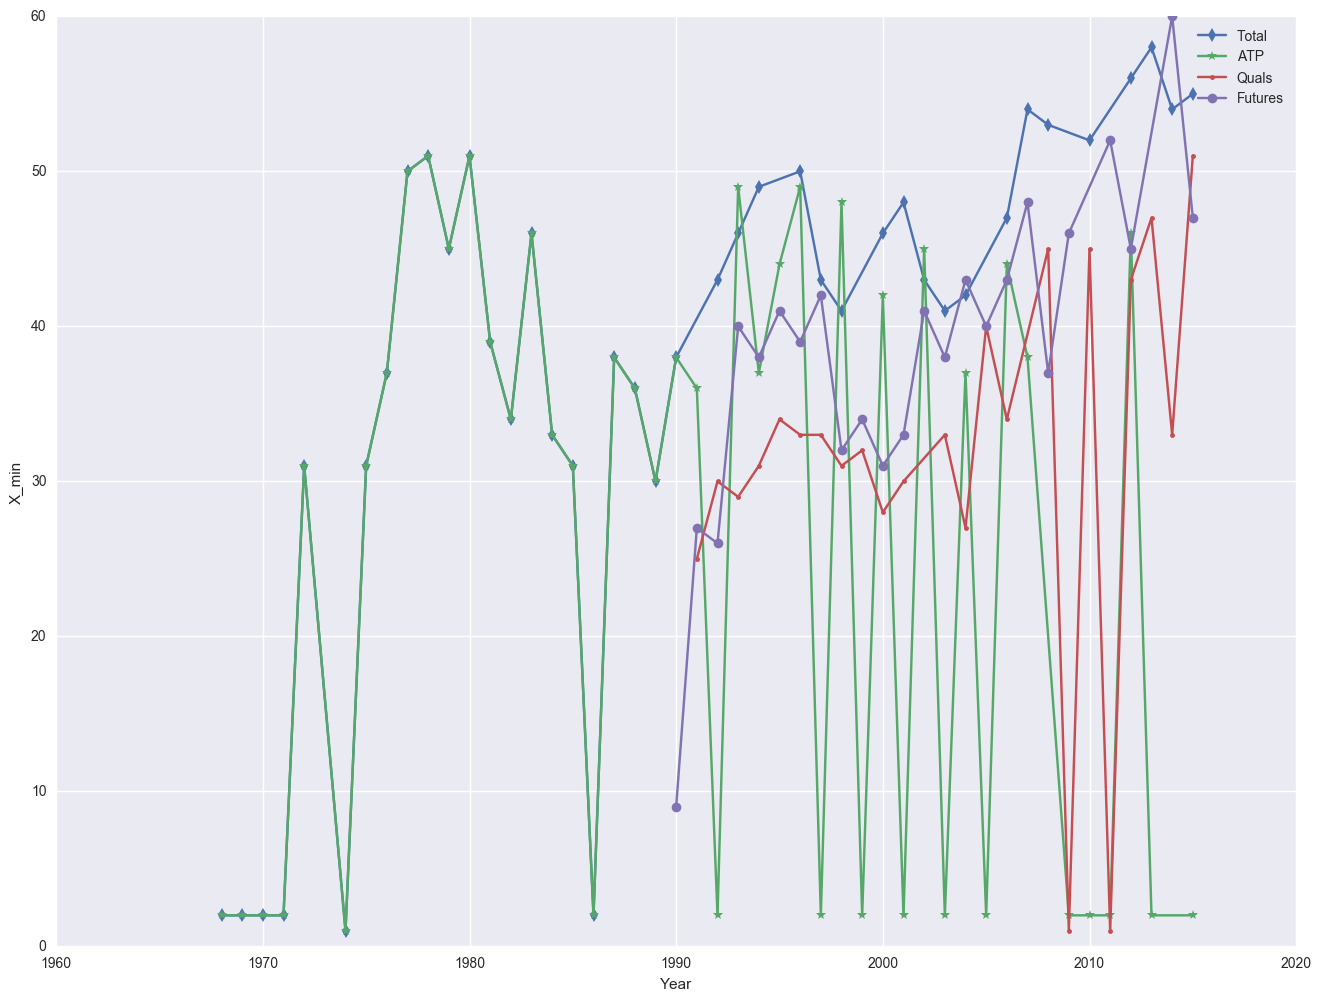

In [21]:
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)
ax.plot(total_years, total_alphas, marker='d', label='Total')
ax.plot(atp_years, atp_alphas, marker='*', label='ATP')
ax.plot(qual_years, qual_alphas, marker='.', label='Quals')
ax.plot(f_years, f_alphas, marker='o', label='Futures')
# ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_ylabel('Alpha')
ax.set_xlabel('Year')
ax.set_ylim([0.8,1.2])
ax.legend()
plt.show()

fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)
ax.plot(total_years, total_lambdas, marker='d', label='Total')
ax.plot(atp_years, atp_lambdas, marker='*', label='ATP')
ax.plot(qual_years, qual_lambdas, marker='.', label='Quals')
ax.plot(f_years, f_lambdas, marker='o', label='Futures')
# ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_ylabel('Lambda')
ax.set_xlabel('Year')
# ax.set_ylim([0.8,1.2])
ax.legend()
plt.show()

fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)
ax.plot(total_years, total_xmins, marker='d', label='Total')
ax.plot(atp_years, atp_xmins, marker='*', label='ATP')
ax.plot(qual_years, qual_xmins, marker='.', label='Quals')
ax.plot(f_years, f_xmins, marker='o', label='Futures')
# ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_ylabel('X_min')
ax.set_xlabel('Year')
# ax.set_ylim([0.8,1.2])
ax.legend()
plt.show()

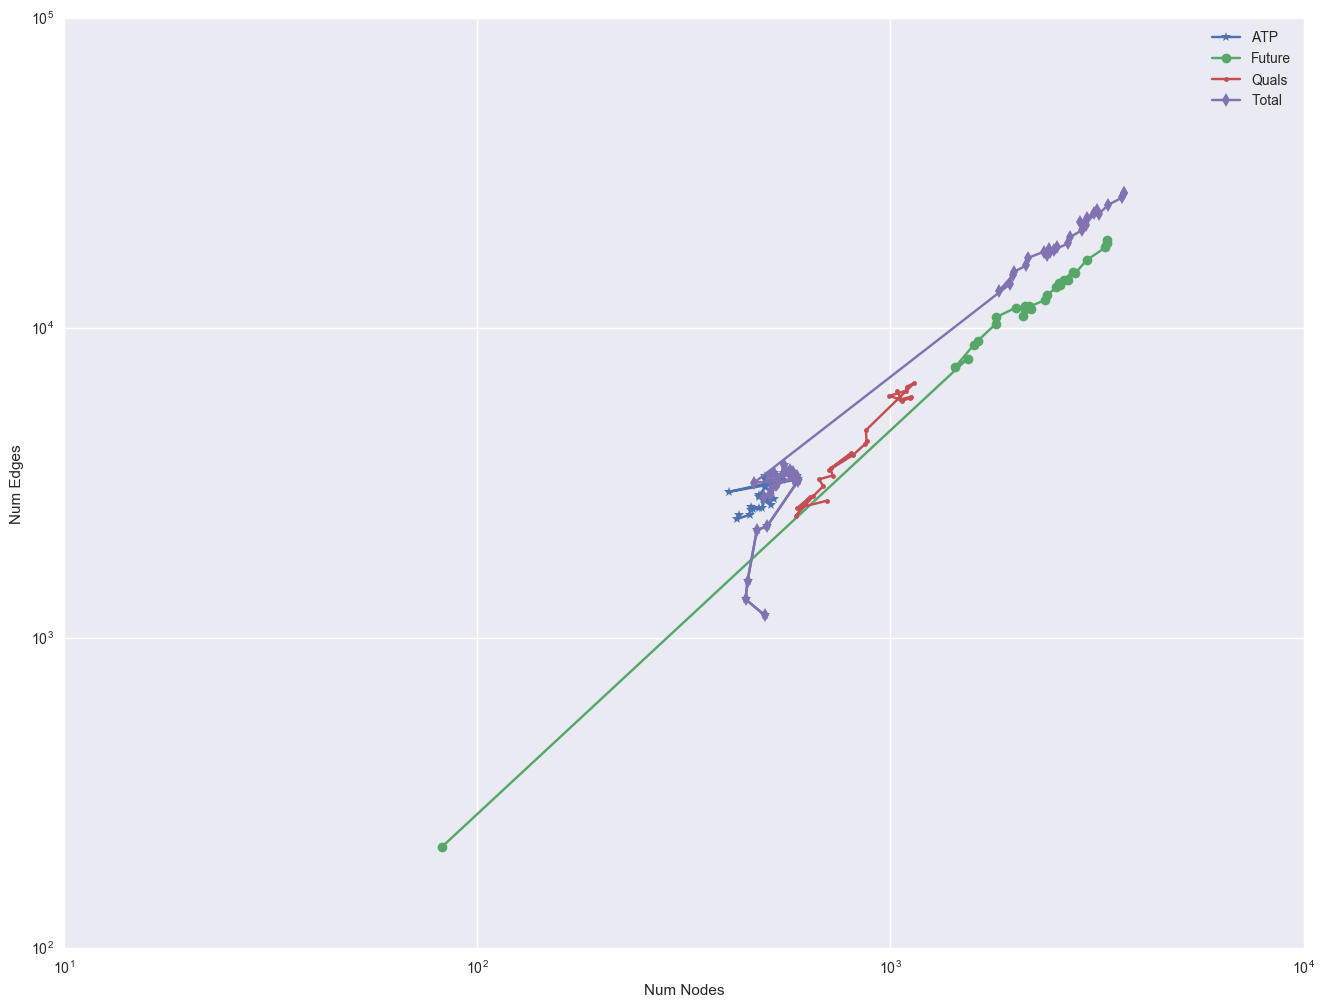

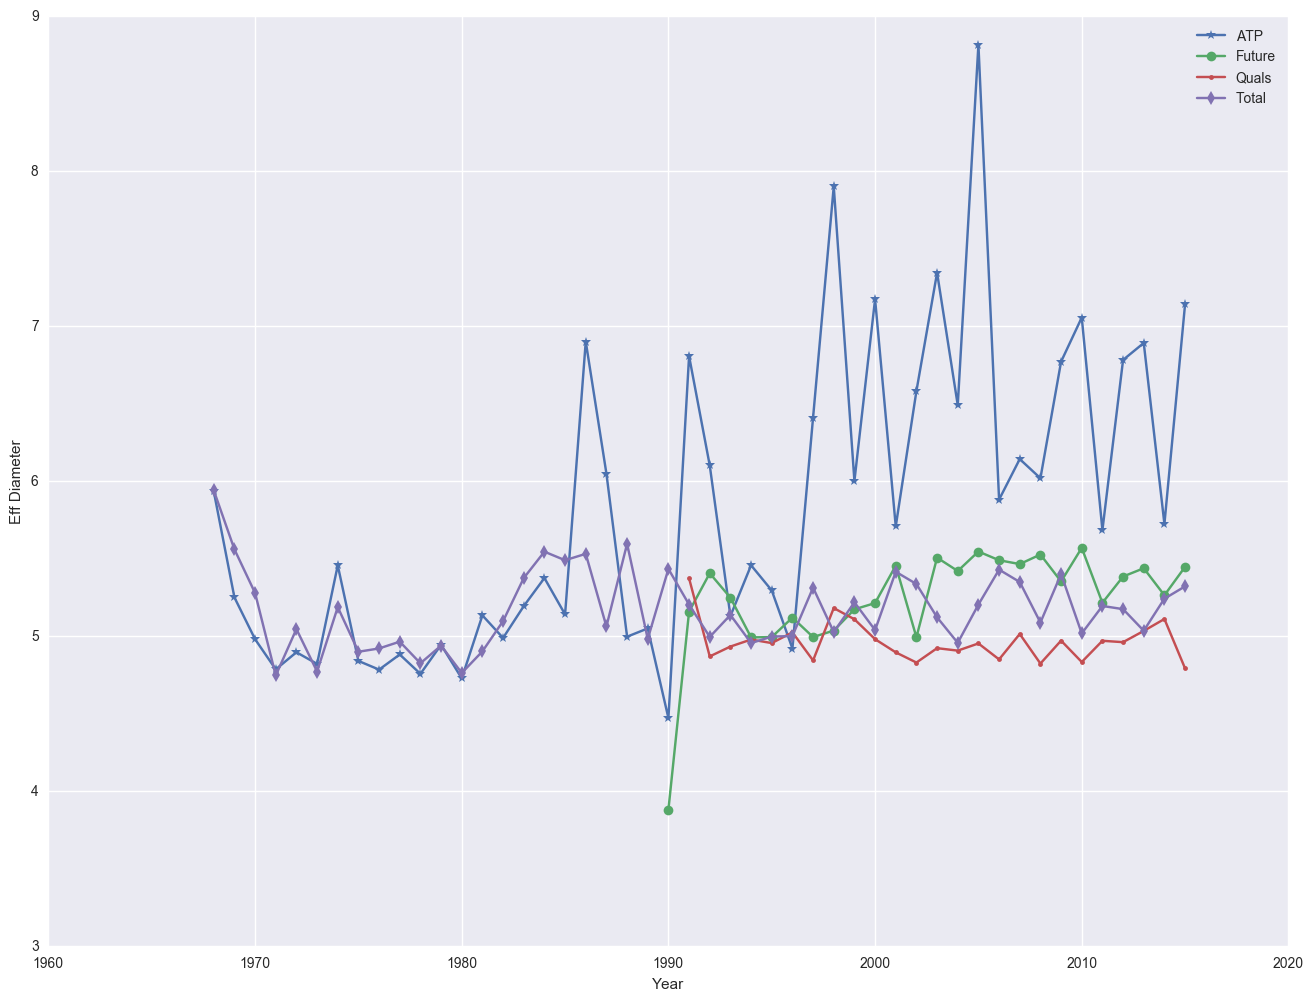

In [71]:
fig1 = plt.figure(figsize=(16,12))
fig2 = plt.figure(figsize=(16,12))
ax1 = fig1.add_subplot(111)
ax2 = fig2.add_subplot(111)

ax1.set_ylabel('Num Edges')
ax1.set_xlabel('Num Nodes')
ax2.set_ylabel('Eff Diameter')
ax2.set_xlabel('Year')
ax1.set_xscale('log')
ax1.set_yscale('log')
# ax.set_ylim([0.8,1.2])
ax.legend()
for tempdf, name, marker in [(atp_df, 'ATP','*'), (futures_df, 'Future','o'), (qual_df, 'Quals','.'), (df, 'Total','d')]:
    N, E, D, years = utils.get_densification(tempdf)
    ax1.plot(N, E, label=name, marker=marker)
    ax2.plot(years, D, label=name, marker=marker)


ax1.legend()
ax2.legend()
plt.show()

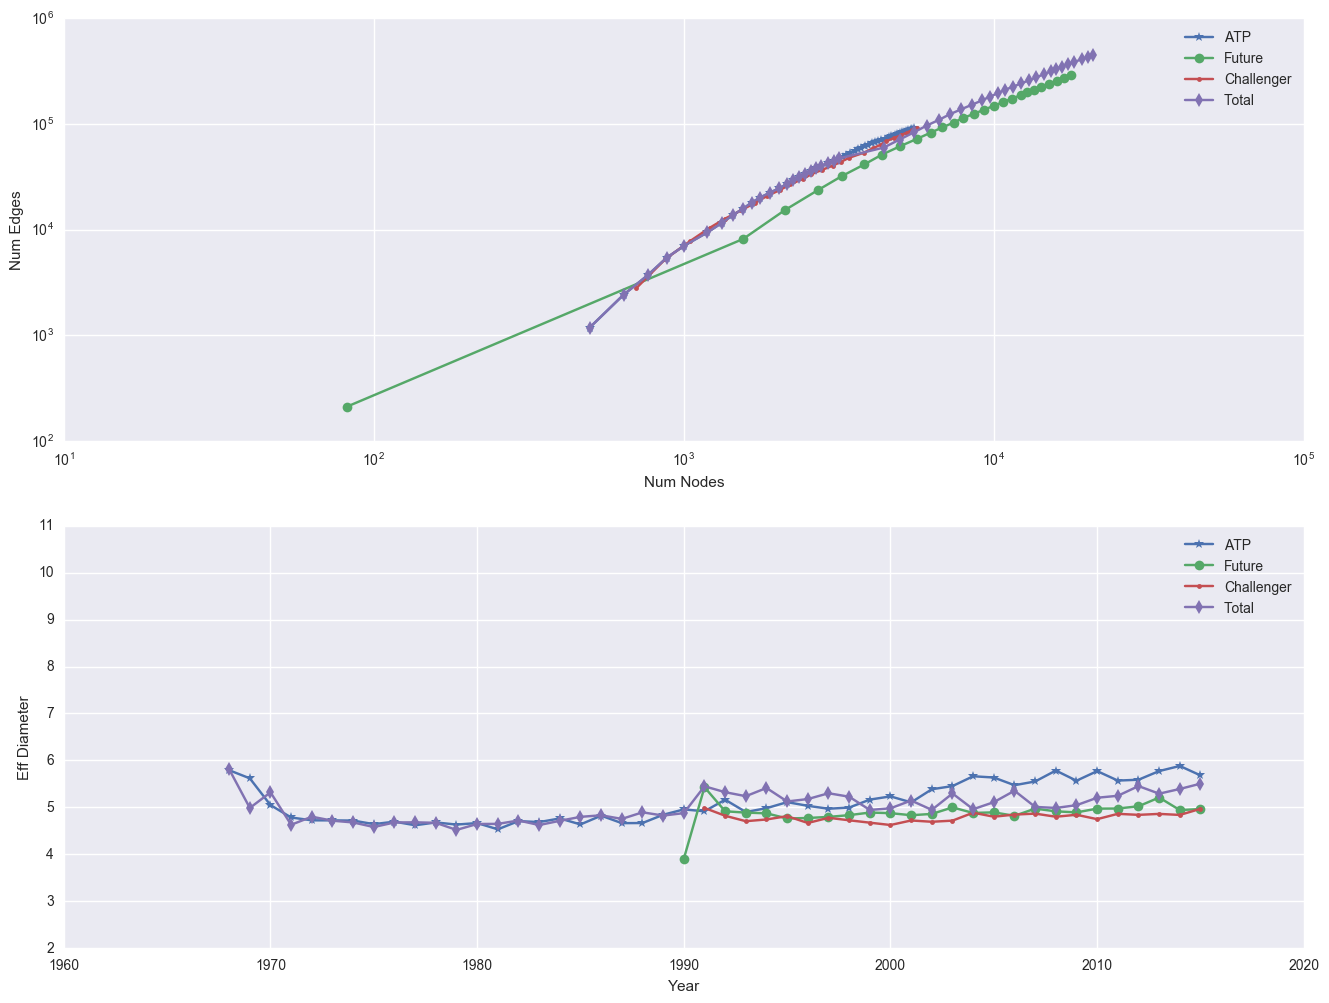

In [105]:
fig1 = plt.figure(figsize=(16,12))
# fig2 = plt.figure(figsize=(16,12))
ax1 = fig1.add_subplot(211)
ax2 = fig1.add_subplot(212)

ax1.set_ylabel('Num Edges')
ax1.set_xlabel('Num Nodes')
ax2.set_ylabel('Eff Diameter')
ax2.set_xlabel('Year')
ax2.set_ylim([2,11])
ax1.set_xscale('log')
ax1.set_yscale('log')
# ax.set_ylim([0.8,1.2])
ax.legend()
for tempdf, name, marker in [(atp_df, 'ATP','*'), (futures_df, 'Future','o'), (qual_df, 'Challenger','.'), (df, 'Total','d')]:
    N, E, D, years = utils.cumulative_get_densification(tempdf)
    ax1.plot(N, E, label=name, marker=marker)
    ax2.plot(years, D, label=name, marker=marker)


ax1.legend()
ax2.legend()
plt.show()

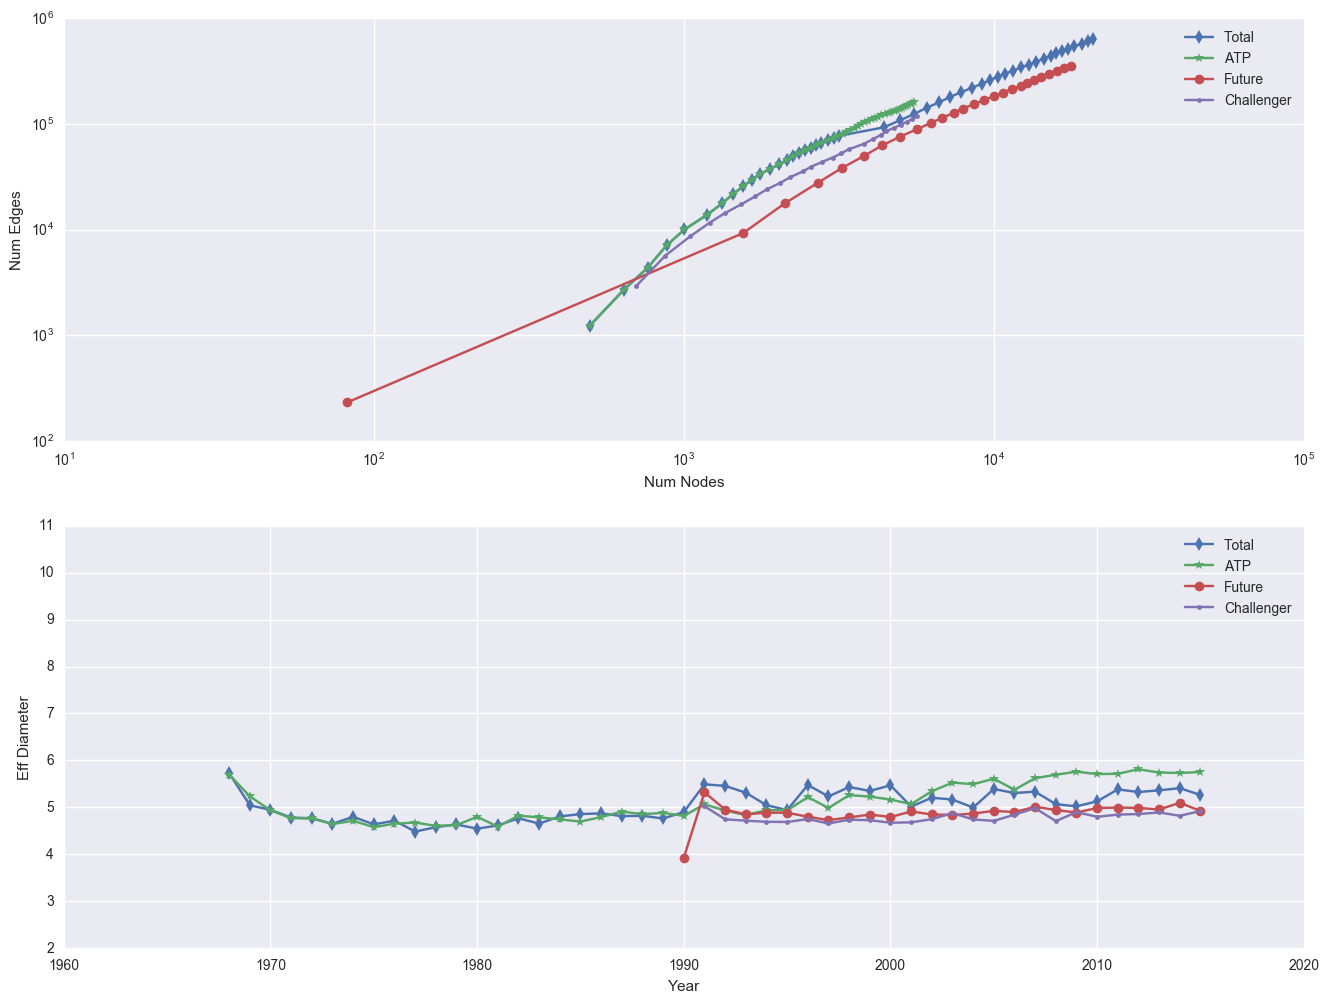

In [104]:
fig1 = plt.figure(figsize=(16,12))
# fig2 = plt.figure(figsize=(16,12))
ax1 = fig1.add_subplot(211)
ax2 = fig1.add_subplot(212)

ax1.set_ylabel('Num Edges')
ax1.set_xlabel('Num Nodes')
ax2.set_ylabel('Eff Diameter')
ax2.set_xlabel('Year')
ax2.set_ylim([2,11])
ax1.set_xscale('log')
ax1.set_yscale('log')
# ax.set_ylim([0.8,1.2])
ax.legend()
for tempdf, name, marker in [(df, 'Total','d'), (atp_df, 'ATP','*'), (futures_df, 'Future','o'), (qual_df, 'Challenger','.') ]:
    N, E, D, years = utils.directed_get_densification(tempdf)
    ax1.plot(N, E, label=name, marker=marker)
    ax2.plot(years, D, label=name, marker=marker)


ax1.legend()
ax2.legend()
plt.show()

In [95]:
for name, G in zip(["Total", "ATP", "Challenger", "Futures"],[totalG, atpG, qualG, fG]):
    print("{}: {}".format(name, snap.GetAnfEffDiam(G)))
    
for name, G in zip(["Total", "ATP", "Challenger", "Futures"],[total_directed_graph, atp_directed_graph, qual_directed_graph, futures_directed_graph]):
    print("Directed {}: {}".format(name, snap.GetAnfEffDiam(G)))

Total: 5.42644872125
ATP: 5.64524056729
Challenger: 4.85625623432
Futures: 5.02719853246
Directed Total: 5.31354514853
Directed ATP: 5.78225416301
Directed Challenger: 4.81258539353
Directed Futures: 5.03894658125


In [100]:
def cumulative_get_cluster_coeff(df):
    years = sorted(df['year'].unique())
    out_clust_coeffs = []
    G = snap.TUNGraph.New()
    for year in years:
        utils.add_df_to_G(df[df['year']==year], G)
        out_clust_coeffs.append(snap.GetClustCf(G))
    return out_clust_coeffs, years



def directed_get_cluster_coeff(df):
    years = sorted(df['year'].unique())
    out_clust_coeffs = []
    G = snap.TNEANet.New()
    for year in years:
        utils.add_df_to_G(df[df['year']==year], G, directed=True)
        out_clust_coeffs.append(snap.GetClustCf(G))
    return out_clust_coeffs, years

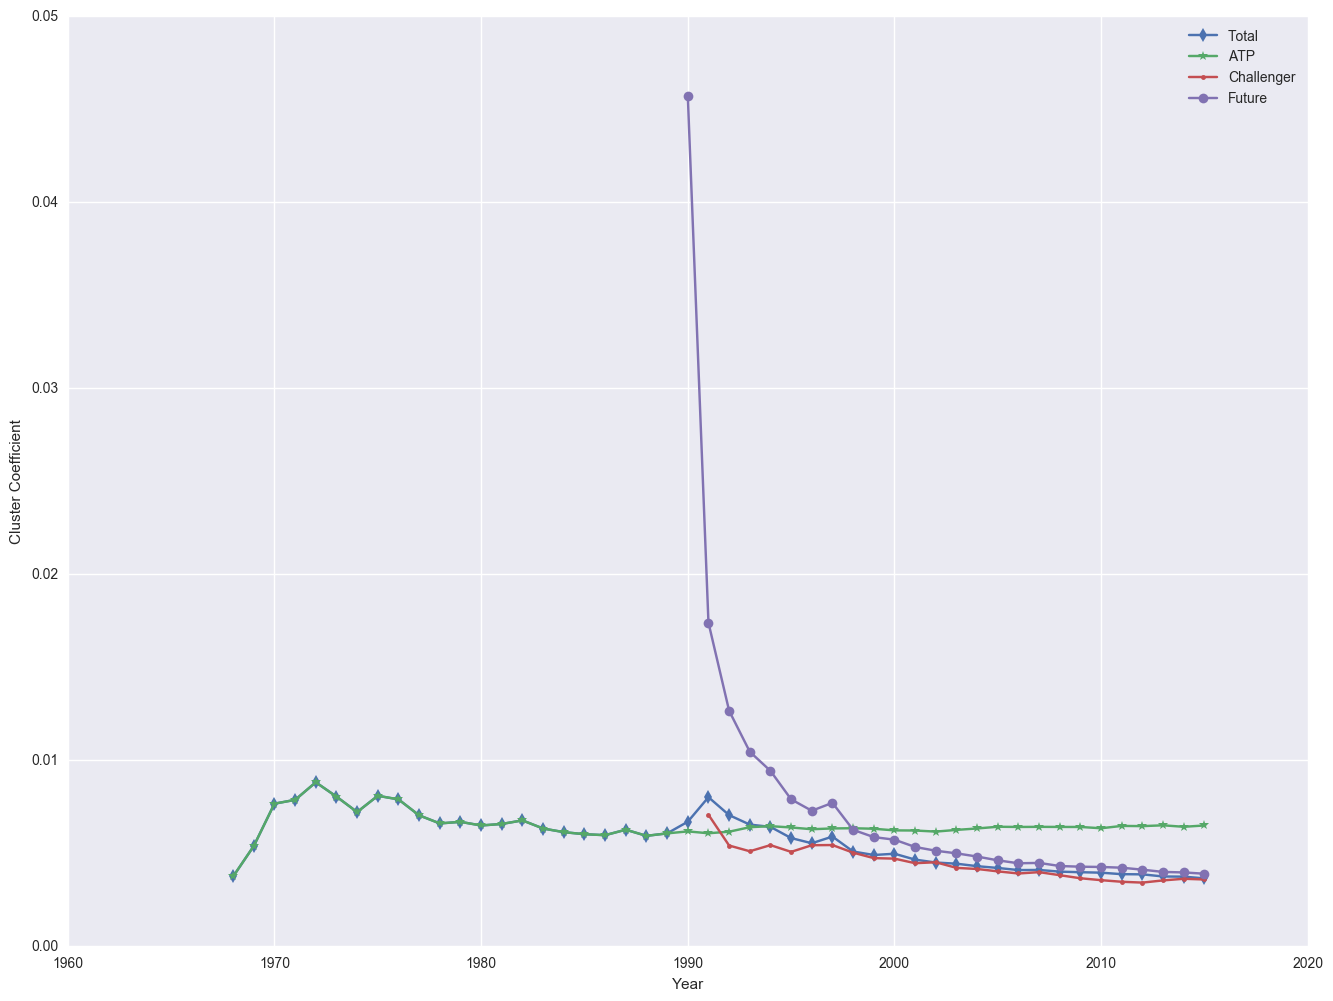

In [102]:
fig1 = plt.figure(figsize=(16,12))
# fig2 = plt.figure(figsize=(16,12))
ax1 = fig1.add_subplot(111)

ax1.set_ylabel('Cluster Coefficient')
ax1.set_xlabel('Year')
# ax.set_ylim([0.8,1.2])
for tempdf, name, marker in [(df, 'Total','d'), (atp_df, 'ATP','*'), (qual_df, 'Challenger','.') , (futures_df, 'Future','o') ]:
    cluster_coeffs, years = directed_get_cluster_coeff(tempdf)
    ax1.plot(years, cluster_coeffs, label=name, marker=marker)
ax1.legend()

ax1.legend()
plt.show()

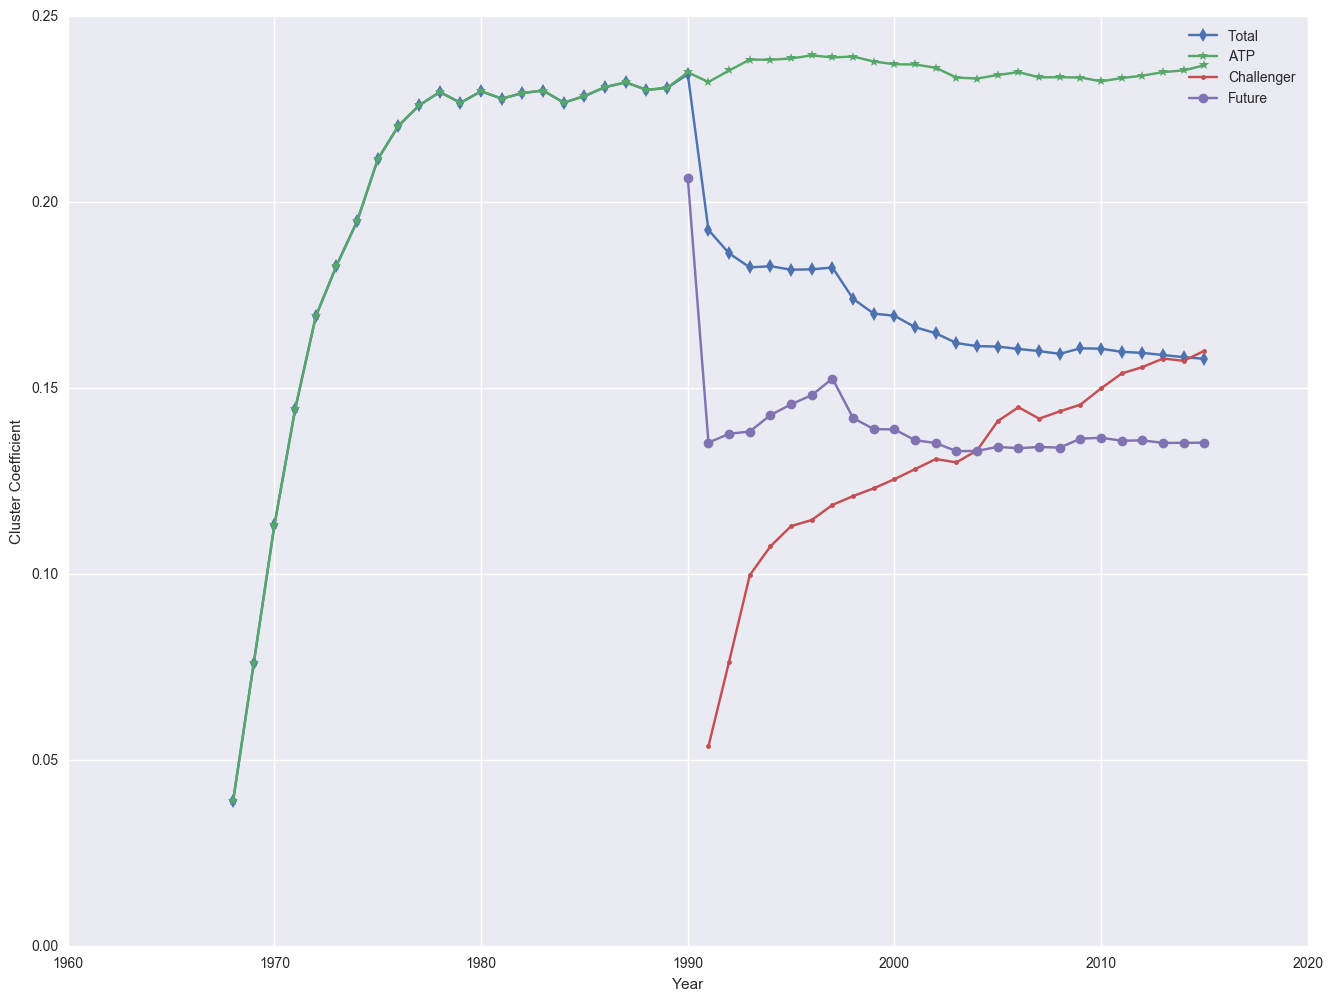

In [103]:
fig1 = plt.figure(figsize=(16,12))
# fig2 = plt.figure(figsize=(16,12))
ax1 = fig1.add_subplot(111)

ax1.set_ylabel('Cluster Coefficient')
ax1.set_xlabel('Year')
# ax.set_ylim([0.8,1.2])
for tempdf, name, marker in [(df, 'Total','d'), (atp_df, 'ATP','*'), (qual_df, 'Challenger','.') , (futures_df, 'Future','o') ]:
    cluster_coeffs, years = cumulative_get_cluster_coeff(tempdf)
    ax1.plot(years, cluster_coeffs, label=name, marker=marker)
ax1.legend()

ax1.legend()
plt.show()

Calculating best minimal value for power law fit


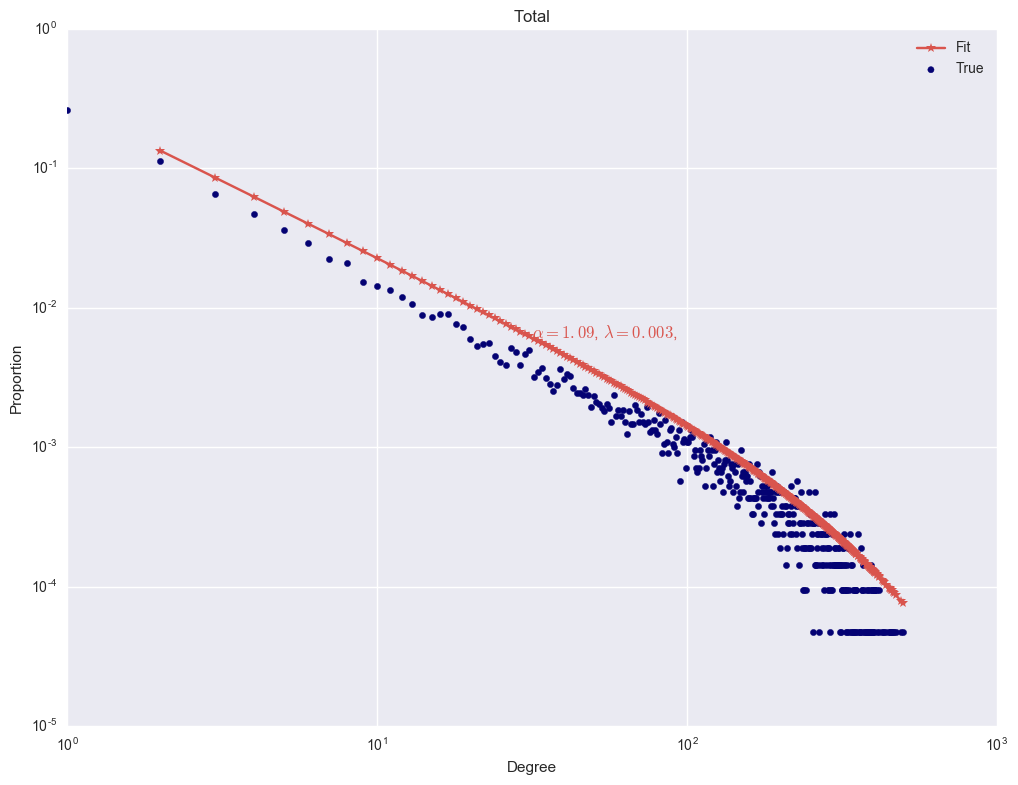

Calculating best minimal value for power law fit


In [ ]:
total_alpha, total_lambda, total_xmin,_ = utils.fit_truncated(total_deg_data)
utils.plot_fit(total_alpha, total_lambda, total_xmin, total_pdf, total_ccdf, total_degs, title="Total")

atp_alpha, atp_lambda, atp_xmin,_ = utils.fit_truncated(atp_deg_data)
utils.plot_fit(atp_alpha, atp_lambda, atp_xmin, atp_pdf, atp_ccdf, atp_degs, title="ATP")

qual_alpha, qual_lambda, qual_xmin,_ = utils.fit_truncated(qual_deg_data)
utils.plot_fit(qual_alpha, qual_lambda, qual_xmin, qual_pdf, qual_ccdf, qual_degs, title="Quals")

f_alpha, f_alpha, f_xmin,_ = utils.fit_truncated(f_deg_data,manual_xmin=2)
utils.plot_fit(f_alpha, f_alpha, 2, f_pdf, f_ccdf, f_degs, title="Futures")

In [118]:
def get_page_ranks(G, names_df):
    PRankH = snap.TIntFltH()
    snap.GetPageRank(G, PRankH)
    ranks = []
    for item in PRankH:
        name = names_df[names_df["id"] == item]["name"].values[0]
        ranks.append( (name, PRankH[item]) )
    return sorted(ranks, key=lambda x : x[1], reverse=True)

In [22]:
atp_deg_df = utils.get_deg_info(atpG, names_df)
qual_deg_df = utils.get_deg_info(qualG, names_df)
f_deg_df = utils.get_deg_info(fG, names_df)
total_deg_df = utils.get_deg_info(totalG, names_df)

In [23]:
total_deg_df[total_deg_df['deg'] >= 200].sort_values("deg", ascending=False).head()

id  deg                   name
4509  20102  649               Ivo Klec
5496   5874  609              Jan Mertl
4151  19925  599  Ruben Ramirez Hidalgo
3401  17159  590           Razvan Sabau
3933  10100  570        Danai Udomchoke

In [153]:
federer_ranks, federer_years = utils.player_page_rank_year(df, "Roger Federer", names_df)

In [154]:
federer_ranks

[2.093747457133501e-05,
 5.7260275774147974e-05,
 0.00010233128026691225,
 0.0002439174215028714,
 0.0004348205116501147,
 0.000583003510666599,
 0.0006804206034071401,
 0.0007530271220746542,
 0.0007815133044233222,
 0.0008260502083136215,
 0.0008534106534515929,
 0.0008626456460835702,
 0.0008577993834967142,
 0.0008467650329568628,
 0.00084180026444511,
 0.0008546920370094266,
 0.0008601758221343897,
 0.0008588764550019754,
 0.0008558880836209279,
 0.0008470718212541908]

In [43]:
temp_atp.join(names_df.set_index('id'), on="id").tail()

id  deg               name
5534   9213    2          Alex Diaz
5535  11554    1     Rodrigo Banzer
5536  11367    1       Rodrigo Arus
5537    831    1   Nicolas Xiviller
5538  18044    1  Tim Van Rijthoven

In [111]:
reload(utils)
print "--------------------ATP--------------------"
utils.print_fit_results_tex(atp_deg_data, True, xmin=2)
print 
print

print "--------------------Qual--------------------"
utils.print_fit_results_tex(qual_deg_data, True, xmin=2)
print 
print

print "--------------------Futures--------------------"
utils.print_fit_results_tex(f_deg_data, True, xmin=2)
print 
print

print "--------------------Total--------------------"
utils.print_fit_results_tex(total_deg_data, True, xmin=2)
print 
print

--------------------ATP--------------------
alpha: 1.45884233274
x_min: 2.0
Number of Data Points: 5539


\begin{table}[h]
\centering
\begin{tabular}{|c||c|c||c|c||c|c||c|c||c|c|}
\hline
 & \multicolumn{2}{c||}{Power} & \multicolumn{2}{c||}{Log-Normal} & \multicolumn{2}{c||}{Exp} & \multicolumn{2}{c||}{Cutoff} & \multicolumn{2}{c||}{Stretched}\\
\cline{2-11}
 & LR & p-val & LR & p-val & LR & p-val & LR & p-val & LR & p-val\\\hline


Calculating best minimal value for power law fit
Assuming nested distributions
Assuming nested distributions


Power&-&-&-279.93&0.00&1611.25&0.00&-427.77&0.00&-334.13&0.00\\\hline
Log-Normal&279.93&0.00&-&-&1891.18&0.00&-147.83&0.00&-54.20&0.00\\\hline
Exp&-1611.25&0.00&-1891.18&0.00&-&-&-2039.01&0.00&-1945.38&0.00\\\hline


Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions

Cutoff&427.77&0.00&147.83&0.00&2039.01&0.00&-&-&93.64&0.00\\\hline
Stretched&334.13&0.00&54.20&0.00&1945.38&0.00&-93.64&0.00&-&-\\\hline
\end{tabular}


--------------------Qual--------------------
alpha: 1.38495692382
x_min: 1.0
Number of Data Points: 5662


\begin{table}[h]
\centering
\begin{tabular}{|c||c|c||c|c||c|c||c|c||c|c|}
\hline
 & \multicolumn{2}{c||}{Power} & \multicolumn{2}{c||}{Log-Normal} & \multicolumn{2}{c||}{Exp} & \multicolumn{2}{c||}{Cutoff} & \multicolumn{2}{c||}{Stretched}\\
\cline{2-11}
 & LR & p-val & LR & p-val & LR & p-val & LR & p-val & LR & p-val\\\hline



Calculating best minimal value for power law fit
Assuming nested distributions
Assuming nested distributions


Power&-&-&-312.49&0.00&3797.87&0.00&-514.39&0.00&-378.47&0.00\\\hline
Log-Normal&312.49&0.00&-&-&4110.37&0.00&-201.89&0.00&-65.97&0.00\\\hline
Exp&-3797.87&0.00&-4110.37&0.00&-&-&-4312.26&0.00&-4176.34&0.00\\\hline
Cutoff&514.39&0.00&201.89&0.00&4312.26&0.00&-&-&135.92&0.00\\\hline
Stretched&378.47&0.00&65.97&0.00&4176.34&0.00&-135.92&0.00&-&-\\\hline
\end{tabular}


--------------------Futures--------------------
alpha: 6.5785330636
x_min: 237.0
Number of Data Points: 17708


\begin{table}[h]
\centering
\begin{tabular}{|c||c|c||c|c||c|c||c|c||c|c|}
\hline
 & \multicolumn{2}{c||}{Power} & \multicolumn{2}{c||}{Log-Normal} & \multicolumn{2}{c||}{Exp} & \multicolumn{2}{c||}{Cutoff} & \multicolumn{2}{c||}{Stretched}\\
\cline{2-11}
 & LR & p-val & LR & p-val & LR & p-val & LR & p-val & LR & p-val\\\hline


Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Calculating best minimal value for power law fit
Assuming nested distributions
Assuming nested distributions


Power&-&-&-6.44&0.04&-5.52&0.00&-4.87&0.00&-6.81&0.03\\\hline
Log-Normal&6.44&0.04&-&-&0.92&0.48&1.57&0.35&-0.37&0.34\\\hline
Exp&5.52&0.00&-0.92&0.48&-&-&0.65&0.25&-1.29&0.11\\\hline


Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions


Cutoff&4.87&0.00&-1.57&0.35&-0.65&0.25&-&-&-1.94&0.28\\\hline
Stretched&6.81&0.03&0.37&0.34&1.29&0.11&1.94&0.28&-&-\\\hline
\end{tabular}


--------------------Total--------------------
alpha: 1.42038796279
x_min: 2.0
Number of Data Points: 20904


\begin{table}[h]
\centering
\begin{tabular}{|c||c|c||c|c||c|c||c|c||c|c|}
\hline
 & \multicolumn{2}{c||}{Power} & \multicolumn{2}{c||}{Log-Normal} & \multicolumn{2}{c||}{Exp} & \multicolumn{2}{c||}{Cutoff} & \multicolumn{2}{c||}{Stretched}\\
\cline{2-11}
 & LR & p-val & LR & p-val & LR & p-val & LR & p-val & LR & p-val\\\hline


Assuming nested distributions
Assuming nested distributions
Calculating best minimal value for power law fit
Assuming nested distributions
Assuming nested distributions


Power&-&-&-1324.09&0.00&5889.63&0.00&-1962.74&0.00&-1588.68&0.00\\\hline
Log-Normal&1324.09&0.00&-&-&7213.72&0.00&-638.65&0.00&-264.59&0.00\\\hline
Exp&-5889.63&0.00&-7213.72&0.00&-&-&-7852.37&0.00&-7478.31&0.00\\\hline


Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions


Cutoff&1962.74&0.00&638.65&0.00&7852.37&0.00&-&-&374.06&0.00\\\hline
Stretched&1588.68&0.00&264.59&0.00&7478.31&0.00&-374.06&0.00&-&-\\\hline
\end{tabular}




Assuming nested distributions


In [112]:
reload(utils)

print "--------------------ATP--------------------"
utils.print_fit_results(atp_deg_data, True)
print 
print

print "--------------------Qual--------------------"
utils.print_fit_results(qual_deg_data, True)
print 
print

print "--------------------Futures--------------------"
utils.print_fit_results(f_deg_data, True)
print 
print

print "--------------------Total--------------------"
utils.print_fit_results(total_deg_data, True)
print 
print

--------------------ATP--------------------
alpha: 1.45884233274
x_min: 2.0
Number of Data Points: 5539


Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions

+-----------------------+----------------+----------------+---------------+-------------------+-----------------------+
|                       |     power      |   lognormal    |  exponential  | power with cutoff | stretched exponential |
+-----------------------+----------------+----------------+---------------+-------------------+-----------------------+
|       power_law       |   0.00,1.000   | -279.93,0.000  | 1611.25,0.000 |   -427.77,0.000   |     -334.13,0.000     |
|   lognormal_positive  |  279.93,0.000  |   0.00,1.000   | 1891.18,0.000 |   -147.83,0.000   |      -54.20,0.000     |
|      exponential      | -1611.25,0.000 | -1891.18,0.000 |   0.00,1.000  |   -2039.01,0.000  |     -1945.38,0.000    |
|  truncated_power_law  |  427.77,0.000  |  147.83,0.000  | 2039.01,0.000 |     0.00,1.000    |      93.64,0.000      |
| stretched_exponential |  334.13,0.000  |  54.20,0.000   | 1945.38,0.000 |    -93.64,0.000   |       0.00,1.000      |
+-----------------------+---------------


Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions


+-----------------------+----------------+----------------+---------------+-------------------+-----------------------+
|                       |     power      |   lognormal    |  exponential  | power with cutoff | stretched exponential |
+-----------------------+----------------+----------------+---------------+-------------------+-----------------------+
|       power_law       |   0.00,1.000   | -268.81,0.000  | 1403.73,0.000 |   -462.43,0.000   |     -341.95,0.000     |
|   lognormal_positive  |  268.81,0.000  |   0.00,1.000   | 1672.55,0.000 |   -193.62,0.000   |      -73.14,0.000     |
|      exponential      | -1403.73,0.000 | -1672.55,0.000 |   0.00,1.000  |   -1866.17,0.000  |     -1745.69,0.000    |
|  truncated_power_law  |  462.43,0.000  |  193.62,0.000  | 1866.17,0.000 |     0.00,1.000    |      120.48,0.000     |
| stretched_exponential |  341.95,0.000  |  73.14,0.000   | 1745.69,0.000 |   -120.48,0.000   |       0.00,1.000      |
+-----------------------+---------------

Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions


+-----------------------+----------------+----------------+---------------+-------------------+-----------------------+
|                       |     power      |   lognormal    |  exponential  | power with cutoff | stretched exponential |
+-----------------------+----------------+----------------+---------------+-------------------+-----------------------+
|       power_law       |   0.00,1.000   | -1454.14,0.000 | 2483.35,0.000 |   -2045.18,0.000  |     -1747.21,0.000    |
|   lognormal_positive  | 1454.14,0.000  |   0.00,1.000   | 3937.49,0.000 |   -591.04,0.000   |     -293.07,0.000     |
|      exponential      | -2483.35,0.000 | -3937.49,0.000 |   0.00,1.000  |   -4528.53,0.000  |     -4230.56,0.000    |
|  truncated_power_law  | 2045.18,0.000  |  591.04,0.000  | 4528.53,0.000 |     0.00,1.000    |      297.97,0.000     |
| stretched_exponential | 1747.21,0.000  |  293.07,0.000  | 4230.56,0.000 |   -297.97,0.000   |       0.00,1.000      |
+-----------------------+---------------

Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions


+-----------------------+----------------+----------------+---------------+-------------------+-----------------------+
|                       |     power      |   lognormal    |  exponential  | power with cutoff | stretched exponential |
+-----------------------+----------------+----------------+---------------+-------------------+-----------------------+
|       power_law       |   0.00,1.000   | -1324.09,0.000 | 5889.63,0.000 |   -1962.74,0.000  |     -1588.68,0.000    |
|   lognormal_positive  | 1324.09,0.000  |   0.00,1.000   | 7213.72,0.000 |   -638.65,0.000   |     -264.59,0.000     |
|      exponential      | -5889.63,0.000 | -7213.72,0.000 |   0.00,1.000  |   -7852.37,0.000  |     -7478.31,0.000    |
|  truncated_power_law  | 1962.74,0.000  |  638.65,0.000  | 7852.37,0.000 |     0.00,1.000    |      374.06,0.000     |
| stretched_exponential | 1588.68,0.000  |  264.59,0.000  | 7478.31,0.000 |   -374.06,0.000   |       0.00,1.000      |
+-----------------------+---------------

Assuming nested distributions


In [113]:
atp_directed_graph = utils.get_directed_graph(atp_df)
print("ATP")
print("In-Degree")
atp_in_deg_data = utils.get_in_deg_data(atp_directed_graph)
utils.print_fit_results(atp_in_deg_data, True)
print()
print("Out-Degree")
atp_out_deg_data = utils.get_out_deg_data(atp_directed_graph)
utils.print_fit_results(atp_out_deg_data, True)
print("")

qual_directed_graph = utils.get_directed_graph(qual_df)
print("Quals")
print("In-Degree")
qual_in_deg_data = utils.get_in_deg_data(qual_directed_graph)
utils.print_fit_results(qual_in_deg_data, True)
print()
print("Out-Degree")
qual_out_deg_data = utils.get_out_deg_data(qual_directed_graph)
utils.print_fit_results(qual_out_deg_data, True)
print("")

futures_directed_graph = utils.get_directed_graph(futures_df)
print("Futures")
print("In-Degree")
futures_in_deg_data = utils.get_in_deg_data(futures_directed_graph)
utils.print_fit_results(futures_in_deg_data, True)
print()
print("Out-Degree")
futures_out_deg_data = utils.get_out_deg_data(futures_directed_graph)
utils.print_fit_results(futures_out_deg_data, True)
print("")

total_directed_graph = utils.get_directed_graph(df)
print("Total")
print("In-Degree")
total_in_deg_data = utils.get_in_deg_data(total_directed_graph)
utils.print_fit_results(total_in_deg_data, True)
print()
print("Out-Degree")
total_out_deg_data = utils.get_out_deg_data(total_directed_graph)
utils.print_fit_results(total_out_deg_data, True)
print("")

ATP
In-Degree
alpha: 1.43139460023
x_min: 2.0
Number of Data Points: 5539


Values less than or equal to 0 in data. Throwing out 0 or negative values
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions


+-----------------------+----------------+----------------+---------------+-------------------+-----------------------+
|                       |     power      |   lognormal    |  exponential  | power with cutoff | stretched exponential |
+-----------------------+----------------+----------------+---------------+-------------------+-----------------------+
|       power_law       |   0.00,1.000   | -170.77,0.000  | 1394.78,0.000 |   -248.12,0.000   |     -199.95,0.000     |
|   lognormal_positive  |  170.77,0.000  |   0.00,1.000   | 1565.55,0.000 |    -77.35,0.000   |      -29.18,0.000     |
|      exponential      | -1394.78,0.000 | -1565.55,0.000 |   0.00,1.000  |   -1642.90,0.000  |     -1594.73,0.000    |
|  truncated_power_law  |  248.12,0.000  |  77.35,0.000   | 1642.90,0.000 |     0.00,1.000    |      48.17,0.000      |
| stretched_exponential |  199.95,0.000  |  29.18,0.000   | 1594.73,0.000 |    -48.17,0.000   |       0.00,1.000      |
+-----------------------+---------------

Values less than or equal to 0 in data. Throwing out 0 or negative values
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions


+-----------------------+----------------+----------------+---------------+-------------------+-----------------------+
|                       |     power      |   lognormal    |  exponential  | power with cutoff | stretched exponential |
+-----------------------+----------------+----------------+---------------+-------------------+-----------------------+
|       power_law       |   0.00,1.000   | -184.90,0.000  | 1866.82,0.000 |   -306.44,0.000   |     -222.13,0.000     |
|   lognormal_positive  |  184.90,0.000  |   0.00,1.000   | 2051.72,0.000 |   -121.54,0.000   |      -37.23,0.000     |
|      exponential      | -1866.82,0.000 | -2051.72,0.000 |   0.00,1.000  |   -2173.26,0.000  |     -2088.95,0.000    |
|  truncated_power_law  |  306.44,0.000  |  121.54,0.000  | 2173.26,0.000 |     0.00,1.000    |      84.31,0.000      |
| stretched_exponential |  222.13,0.000  |  37.23,0.000   | 2088.95,0.000 |    -84.31,0.000   |       0.00,1.000      |
+-----------------------+---------------

Values less than or equal to 0 in data. Throwing out 0 or negative values
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Values less than or equal to 0 in data. Throwing out 0 or negative values
Assuming nested distributions
Assuming nested distributions


+-----------------------+--------------+---------------+--------------+-------------------+-----------------------+
|                       |    power     |   lognormal   | exponential  | power with cutoff | stretched exponential |
+-----------------------+--------------+---------------+--------------+-------------------+-----------------------+
|       power_law       |  0.00,1.000  | -427.38,0.000 | -47.76,0.416 |   -527.99,0.000   |     -510.98,0.000     |
|   lognormal_positive  | 427.38,0.000 |   0.00,1.000  | 379.61,0.000 |   -100.62,0.000   |      -83.60,0.000     |
|      exponential      | 47.76,0.416  | -379.61,0.000 |  0.00,1.000  |   -480.23,0.000   |     -463.21,0.000     |
|  truncated_power_law  | 527.99,0.000 |  100.62,0.000 | 480.23,0.000 |     0.00,1.000    |      17.02,0.075      |
| stretched_exponential | 510.98,0.000 |  83.60,0.000  | 463.21,0.000 |    -17.02,0.075   |       0.00,1.000      |
+-----------------------+--------------+---------------+--------------+-

Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions


+-----------------------+---------------+----------------+---------------+-------------------+-----------------------+
|                       |     power     |   lognormal    |  exponential  | power with cutoff | stretched exponential |
+-----------------------+---------------+----------------+---------------+-------------------+-----------------------+
|       power_law       |   0.00,1.000  | -263.84,0.000  |  951.99,0.000 |   -416.92,0.000   |     -327.76,0.000     |
|   lognormal_positive  |  263.84,0.000 |   0.00,1.000   | 1215.83,0.000 |   -153.07,0.000   |      -63.92,0.000     |
|      exponential      | -951.99,0.000 | -1215.83,0.000 |   0.00,1.000  |   -1368.90,0.000  |     -1279.75,0.000    |
|  truncated_power_law  |  416.92,0.000 |  153.07,0.000  | 1368.90,0.000 |     0.00,1.000    |      89.16,0.000      |
| stretched_exponential |  327.76,0.000 |  63.92,0.000   | 1279.75,0.000 |    -89.16,0.000   |       0.00,1.000      |
+-----------------------+---------------+-------

Values less than or equal to 0 in data. Throwing out 0 or negative values
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions


+-----------------------+---------------+----------------+---------------+-------------------+-----------------------+
|                       |     power     |   lognormal    |  exponential  | power with cutoff | stretched exponential |
+-----------------------+---------------+----------------+---------------+-------------------+-----------------------+
|       power_law       |   0.00,1.000  | -1299.76,0.000 |  153.33,0.152 |   -1645.10,0.000  |     -1544.45,0.000    |
|   lognormal_positive  | 1299.76,0.000 |   0.00,1.000   | 1453.09,0.000 |   -345.34,0.000   |     -244.68,0.000     |
|      exponential      | -153.33,0.152 | -1453.09,0.000 |   0.00,1.000  |   -1798.43,0.000  |     -1697.78,0.000    |
|  truncated_power_law  | 1645.10,0.000 |  345.34,0.000  | 1798.43,0.000 |     0.00,1.000    |      100.65,0.000     |
| stretched_exponential | 1544.45,0.000 |  244.68,0.000  | 1697.78,0.000 |   -100.65,0.000   |       0.00,1.000      |
+-----------------------+---------------+-------

Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions


+-----------------------+---------------+----------------+---------------+-------------------+-----------------------+
|                       |     power     |   lognormal    |  exponential  | power with cutoff | stretched exponential |
+-----------------------+---------------+----------------+---------------+-------------------+-----------------------+
|       power_law       |   0.00,1.000  | -1542.26,0.000 |  746.31,0.000 |   -2046.02,0.000  |     -1829.68,0.000    |
|   lognormal_positive  | 1542.26,0.000 |   0.00,1.000   | 2288.56,0.000 |   -503.76,0.000   |     -287.43,0.000     |
|      exponential      | -746.31,0.000 | -2288.56,0.000 |   0.00,1.000  |   -2792.32,0.000  |     -2575.99,0.000    |
|  truncated_power_law  | 2046.02,0.000 |  503.76,0.000  | 2792.32,0.000 |     0.00,1.000    |      216.33,0.000     |
| stretched_exponential | 1829.68,0.000 |  287.43,0.000  | 2575.99,0.000 |   -216.33,0.000   |       0.00,1.000      |
+-----------------------+---------------+-------

Values less than or equal to 0 in data. Throwing out 0 or negative values
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Values less than or equal to 0 in data. Throwing out 0 or negative values
Assuming nested distributions


+-----------------------+----------------+----------------+---------------+-------------------+-----------------------+
|                       |     power      |   lognormal    |  exponential  | power with cutoff | stretched exponential |
+-----------------------+----------------+----------------+---------------+-------------------+-----------------------+
|       power_law       |   0.00,1.000   | -1154.49,0.000 | 2418.91,0.000 |   -1572.77,0.000  |     -1365.64,0.000    |
|   lognormal_positive  | 1154.49,0.000  |   0.00,1.000   | 3573.40,0.000 |   -418.28,0.000   |     -211.15,0.000     |
|      exponential      | -2418.91,0.000 | -3573.40,0.000 |   0.00,1.000  |   -3991.68,0.000  |     -3784.55,0.000    |
|  truncated_power_law  | 1572.77,0.000  |  418.28,0.000  | 3991.68,0.000 |     0.00,1.000    |      207.13,0.000     |
| stretched_exponential | 1365.64,0.000  |  211.15,0.000  | 3784.55,0.000 |   -207.13,0.000   |       0.00,1.000      |
+-----------------------+---------------

Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions


+-----------------------+----------------+----------------+---------------+-------------------+-----------------------+
|                       |     power      |   lognormal    |  exponential  | power with cutoff | stretched exponential |
+-----------------------+----------------+----------------+---------------+-------------------+-----------------------+
|       power_law       |   0.00,1.000   | -1308.38,0.000 | 4486.84,0.000 |   -1825.32,0.000  |     -1541.17,0.000    |
|   lognormal_positive  | 1308.38,0.000  |   0.00,1.000   | 5795.22,0.000 |   -516.95,0.000   |     -232.80,0.000     |
|      exponential      | -4486.84,0.000 | -5795.22,0.000 |   0.00,1.000  |   -6312.17,0.000  |     -6028.02,0.000    |
|  truncated_power_law  | 1825.32,0.000  |  516.95,0.000  | 6312.17,0.000 |     0.00,1.000    |      284.15,0.000     |
| stretched_exponential | 1541.17,0.000  |  232.80,0.000  | 6028.02,0.000 |   -284.15,0.000   |       0.00,1.000      |
+-----------------------+---------------

Assuming nested distributions


In [73]:
atp_directed_graph = utils.get_directed_graph(atp_df)
print("ATP")
print("In-Degree")
atp_in_deg_data = utils.get_in_deg_data(atp_directed_graph)
utils.print_fit_results(atp_in_deg_data, True)
print()
print("Out-Degree")
atp_out_deg_data = utils.get_out_deg_data(atp_directed_graph)
utils.print_fit_results(atp_out_deg_data, True)
print("")

qual_directed_graph = utils.get_directed_graph(qual_df)
print("Quals")
print("In-Degree")
qual_in_deg_data = utils.get_in_deg_data(qual_directed_graph)
utils.print_fit_results(qual_in_deg_data, True)
print()
print("Out-Degree")
qual_out_deg_data = utils.get_out_deg_data(qual_directed_graph)
utils.print_fit_results(qual_out_deg_data, True)
print("")

futures_directed_graph = utils.get_directed_graph(futures_df)
print("Futures")
print("In-Degree")
futures_in_deg_data = utils.get_in_deg_data(futures_directed_graph)
utils.print_fit_results(futures_in_deg_data, True)
print()
print("Out-Degree")
futures_out_deg_data = utils.get_out_deg_data(futures_directed_graph)
utils.print_fit_results(futures_out_deg_data, True)
print("")

total_directed_graph = utils.get_directed_graph(df)
print("Total")
print("In-Degree")
total_in_deg_data = utils.get_in_deg_data(total_directed_graph)
utils.print_fit_results(total_in_deg_data, True)
print()
print("Out-Degree")
total_out_deg_data = utils.get_out_deg_data(total_directed_graph)
utils.print_fit_results(total_out_deg_data, True)
print("")

ATP
In-Degree
alpha: 3.93837996039
x_min: 339.0
Number of Data Points: 5539


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Assuming nested distributions
Assuming nested distributions


+-----------------------+------------+-------------+-------------+-------------------+-----------------------+
|                       |   power    |  lognormal  | exponential | power with cutoff | stretched exponential |
+-----------------------+------------+-------------+-------------+-------------------+-----------------------+
|       power_law       | 0.00,1.000 | -2.41,0.157 | -2.33,0.305 |    -2.56,0.024    |      -2.53,0.141      |
|   lognormal_positive  | 2.41,0.157 |  0.00,1.000 |  0.08,0.899 |    -0.15,0.425    |      -0.12,0.412      |
|      exponential      | 2.33,0.305 | -0.08,0.899 |  0.00,1.000 |    -0.23,0.706    |      -0.20,0.525      |
|  truncated_power_law  | 2.56,0.024 |  0.15,0.425 |  0.23,0.706 |     0.00,1.000    |       0.03,0.651      |
| stretched_exponential | 2.53,0.141 |  0.12,0.412 |  0.20,0.525 |    -0.03,0.651    |       0.00,1.000      |
+-----------------------+------------+-------------+-------------+-------------------+-----------------------+
(

Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions


+-----------------------+----------------+----------------+---------------+-------------------+-----------------------+
|                       |     power      |   lognormal    |  exponential  | power with cutoff | stretched exponential |
+-----------------------+----------------+----------------+---------------+-------------------+-----------------------+
|       power_law       |   0.00,1.000   | -184.90,0.000  | 1866.82,0.000 |   -306.44,0.000   |     -222.13,0.000     |
|   lognormal_positive  |  184.90,0.000  |   0.00,1.000   | 2051.72,0.000 |   -121.54,0.000   |      -37.23,0.000     |
|      exponential      | -1866.82,0.000 | -2051.72,0.000 |   0.00,1.000  |   -2173.26,0.000  |     -2088.95,0.000    |
|  truncated_power_law  |  306.44,0.000  |  121.54,0.000  | 2173.26,0.000 |     0.00,1.000    |      84.31,0.000      |
| stretched_exponential |  222.13,0.000  |  37.23,0.000   | 2088.95,0.000 |    -84.31,0.000   |       0.00,1.000      |
+-----------------------+---------------

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Assuming nested distributions
Assuming nested distributions


+-----------------------+------------+-------------+-------------+-------------------+-----------------------+
|                       |   power    |  lognormal  | exponential | power with cutoff | stretched exponential |
+-----------------------+------------+-------------+-------------+-------------------+-----------------------+
|       power_law       | 0.00,1.000 | -4.11,0.089 | -3.03,0.004 |    -2.72,0.020    |      -4.31,0.085      |
|   lognormal_positive  | 4.11,0.089 |  0.00,1.000 |  1.08,0.434 |     1.39,0.367    |      -0.20,0.562      |
|      exponential      | 3.03,0.004 | -1.08,0.434 |  0.00,1.000 |     0.31,0.065    |      -1.28,0.109      |
|  truncated_power_law  | 2.72,0.020 | -1.39,0.367 | -0.31,0.065 |     0.00,1.000    |      -1.59,0.332      |
| stretched_exponential | 4.31,0.085 |  0.20,0.562 |  1.28,0.109 |     1.59,0.332    |       0.00,1.000      |
+-----------------------+------------+-------------+-------------+-------------------+-----------------------+
(

Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions


+-----------------------+------------+-------------+-------------+-------------------+-----------------------+
|                       |   power    |  lognormal  | exponential | power with cutoff | stretched exponential |
+-----------------------+------------+-------------+-------------+-------------------+-----------------------+
|       power_law       | 0.00,1.000 | -4.46,0.052 | -3.74,0.002 |    -3.38,0.009    |      -4.93,0.043      |
|   lognormal_positive  | 4.46,0.052 |  0.00,1.000 |  0.72,0.519 |     1.08,0.407    |      -0.46,0.120      |
|      exponential      | 3.74,0.002 | -0.72,0.519 |  0.00,1.000 |     0.36,0.058    |      -1.19,0.124      |
|  truncated_power_law  | 3.38,0.009 | -1.08,0.407 | -0.36,0.058 |     0.00,1.000    |      -1.54,0.283      |
| stretched_exponential | 4.93,0.043 |  0.46,0.120 |  1.19,0.124 |     1.54,0.283    |       0.00,1.000      |
+-----------------------+------------+-------------+-------------+-------------------+-----------------------+



Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Calculating best minimal value for power law fit
Assuming nested distributions
Assuming nested distributions


+-----------------------+------------+-------------+-------------+-------------------+-----------------------+
|                       |   power    |  lognormal  | exponential | power with cutoff | stretched exponential |
+-----------------------+------------+-------------+-------------+-------------------+-----------------------+
|       power_law       | 0.00,1.000 | -2.27,0.179 | -2.43,0.100 |    -2.33,0.031    |      -2.49,0.161      |
|   lognormal_positive  | 2.27,0.179 |  0.00,1.000 | -0.16,0.501 |    -0.06,0.901    |      -0.22,0.129      |
|      exponential      | 2.43,0.100 |  0.16,0.501 |  0.00,1.000 |     0.10,0.639    |      -0.06,0.724      |
|  truncated_power_law  | 2.33,0.031 |  0.06,0.901 | -0.10,0.639 |     0.00,1.000    |      -0.17,0.751      |
| stretched_exponential | 2.49,0.161 |  0.22,0.129 |  0.06,0.724 |     0.17,0.751    |       0.00,1.000      |
+-----------------------+------------+-------------+-------------+-------------------+-----------------------+
(

Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions


+-----------------------+------------+-------------+-------------+-------------------+-----------------------+
|                       |   power    |  lognormal  | exponential | power with cutoff | stretched exponential |
+-----------------------+------------+-------------+-------------+-------------------+-----------------------+
|       power_law       | 0.00,1.000 | -8.97,0.010 | -9.15,0.002 |    -8.66,0.000    |      -9.37,0.009      |
|   lognormal_positive  | 8.97,0.010 |  0.00,1.000 | -0.18,0.768 |     0.31,0.773    |      -0.40,0.224      |
|      exponential      | 9.15,0.002 |  0.18,0.768 |  0.00,1.000 |     0.49,0.331    |      -0.22,0.504      |
|  truncated_power_law  | 8.66,0.000 | -0.31,0.773 | -0.49,0.331 |     0.00,1.000    |      -0.72,0.525      |
| stretched_exponential | 9.37,0.009 |  0.40,0.224 |  0.22,0.504 |     0.72,0.525    |       0.00,1.000      |
+-----------------------+------------+-------------+-------------+-------------------+-----------------------+



Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Assuming nested distributions


+-----------------------+-------------+-------------+-------------+-------------------+-----------------------+
|                       |    power    |  lognormal  | exponential | power with cutoff | stretched exponential |
+-----------------------+-------------+-------------+-------------+-------------------+-----------------------+
|       power_law       |  0.00,1.000 | -1.06,0.000 |  2.21,0.371 |    -1.16,0.128    |      -0.83,0.186      |
|   lognormal_positive  |  1.06,0.000 |  0.00,1.000 |  3.27,0.132 |    -0.09,0.730    |       0.23,0.490      |
|      exponential      | -2.21,0.371 | -3.27,0.132 |  0.00,1.000 |    -3.37,0.168    |      -3.04,0.014      |
|  truncated_power_law  |  1.16,0.128 |  0.09,0.730 |  3.37,0.168 |     0.00,1.000    |       0.32,0.590      |
| stretched_exponential |  0.83,0.186 | -0.23,0.490 |  3.04,0.014 |    -0.32,0.590    |       0.00,1.000      |
+-----------------------+-------------+-------------+-------------+-------------------+-----------------

Assuming nested distributions


+-----------------------+-----------------+-----------------+----------------+-------------------+-----------------------+
|                       |      power      |    lognormal    |  exponential   | power with cutoff | stretched exponential |
+-----------------------+-----------------+-----------------+----------------+-------------------+-----------------------+
|       power_law       |    0.00,1.000   |  -1543.49,0.000 | 11951.82,0.000 |   -2157.73,0.000  |     -1797.70,0.000    |
|   lognormal_positive  |  1543.49,0.000  |    0.00,1.000   | 13495.31,0.000 |   -614.24,0.000   |     -254.21,0.000     |
|      exponential      | -11951.82,0.000 | -13495.31,0.000 |   0.00,1.000   |  -14109.55,0.000  |    -13749.52,0.000    |
|  truncated_power_law  |  2157.73,0.000  |   614.24,0.000  | 14109.55,0.000 |     0.00,1.000    |      360.04,0.000     |
| stretched_exponential |  1797.70,0.000  |   254.21,0.000  | 13749.52,0.000 |   -360.04,0.000   |       0.00,1.000      |
+---------------

Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions


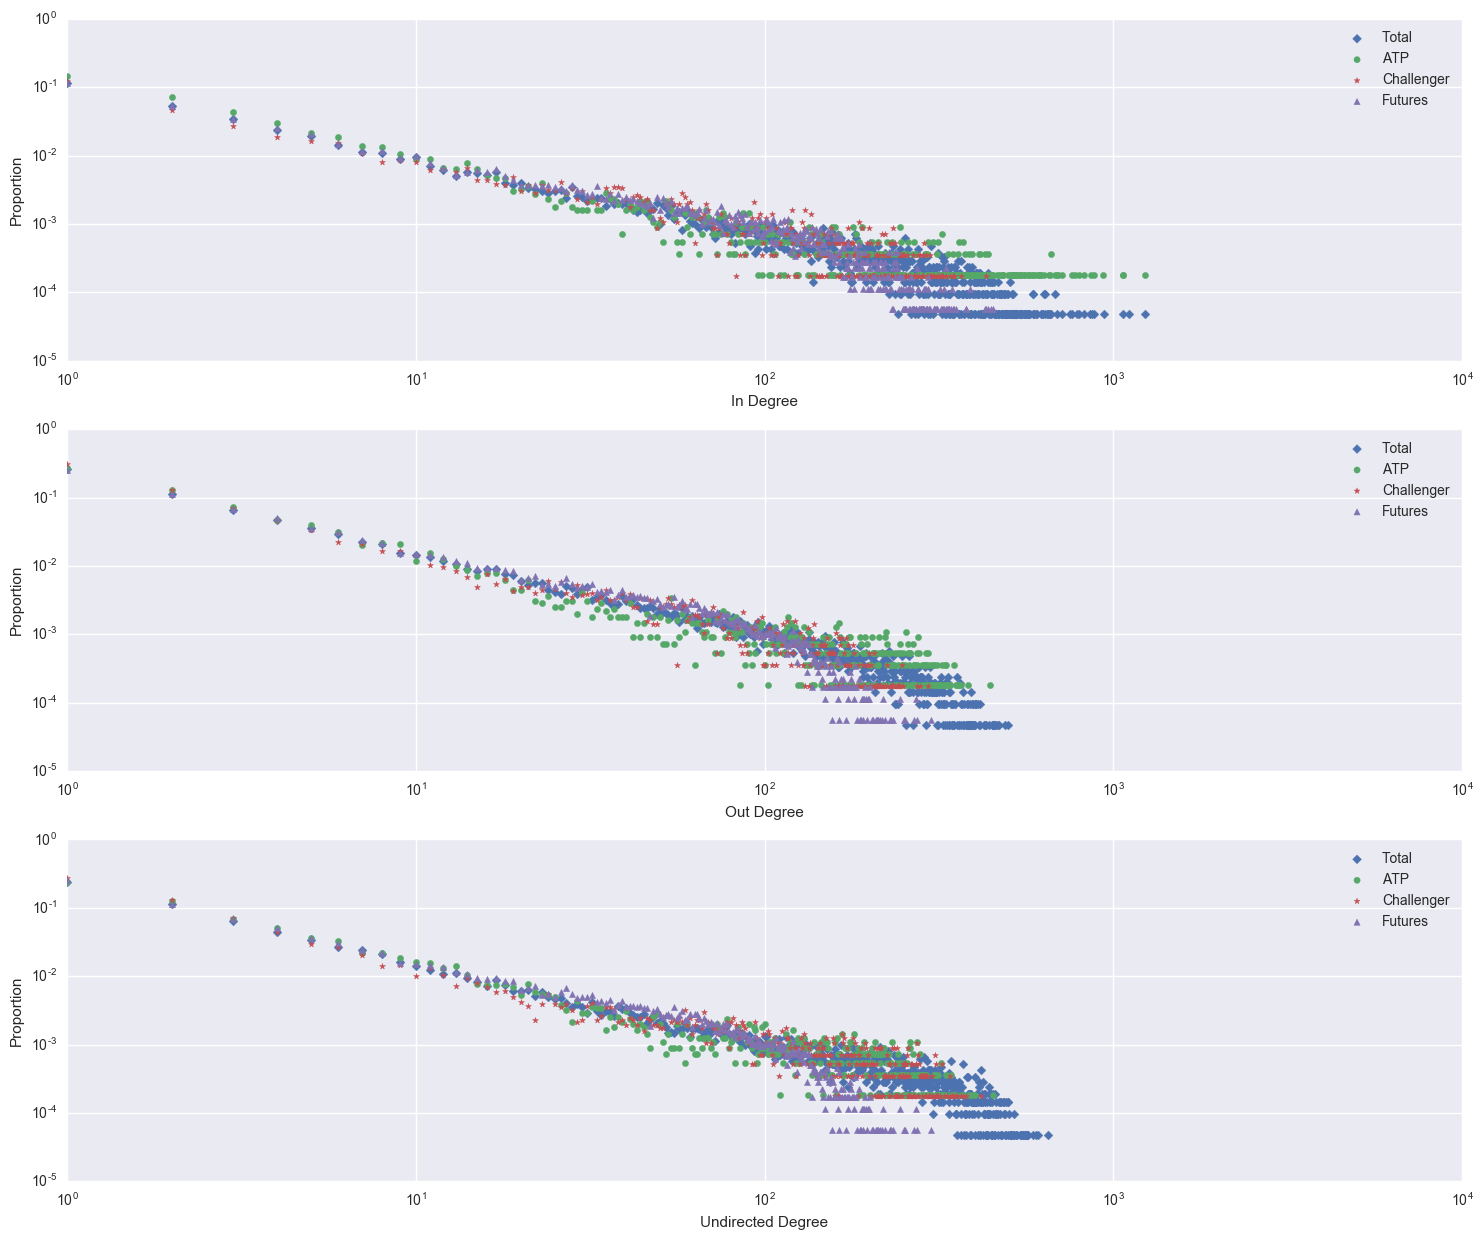

In [76]:
atp_deg_counts, atp_degs, atp_cdf, atp_ccdf, atp_pdf = utils.get_in_dists(atp_directed_graph)
qual_deg_counts, qual_degs, qual_cdf, qual_ccdf, qual_pdf = utils.get_in_dists(qual_directed_graph)
futures_deg_counts, futures_degs, futures_cdf, futures_ccdf, futures_pdf = utils.get_in_dists(futures_directed_graph)
total_deg_counts, total_degs, total_cdf, total_ccdf, total_pdf = utils.get_in_dists(total_directed_graph)

fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(311)
ax.scatter(total_degs, total_pdf, marker='D', color=sns.color_palette()[0], label="Total")
ax.scatter(atp_degs, atp_pdf, marker='o', color=sns.color_palette()[1], label="ATP")
ax.scatter(qual_degs, qual_pdf, marker='*', color=sns.color_palette()[2], label="Challenger")
ax.scatter(futures_degs, futures_pdf, marker='^', color=sns.color_palette()[3], label="Futures")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel('Proportion')
ax.set_xlabel('In Degree')
ax.set_ylim([1e-5,1])
ax.set_xlim([1,1e4])
ax.legend()

atp_deg_counts, atp_degs, atp_cdf, atp_ccdf, atp_pdf = utils.get_out_dists(atp_directed_graph)
qual_deg_counts, qual_degs, qual_cdf, qual_ccdf, qual_pdf = utils.get_out_dists(qual_directed_graph)
futures_deg_counts, futures_degs, futures_cdf, futures_ccdf, futures_pdf = utils.get_out_dists(futures_directed_graph)
total_deg_counts, total_degs, total_cdf, total_ccdf, total_pdf = utils.get_out_dists(total_directed_graph)

ax = fig.add_subplot(312)
ax.scatter(total_degs, total_pdf, marker='D', color=sns.color_palette()[0], label="Total")
ax.scatter(atp_degs, atp_pdf, marker='o', color=sns.color_palette()[1], label="ATP")
ax.scatter(qual_degs, qual_pdf, marker='*', color=sns.color_palette()[2], label="Challenger")
ax.scatter(futures_degs, futures_pdf, marker='^', color=sns.color_palette()[3], label="Futures")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel('Proportion')
ax.set_xlabel('Out Degree')
ax.set_ylim([1e-5,1])
ax.set_xlim([1,1e4])
ax.legend()



atp_deg_counts, atp_degs, atp_cdf, atp_ccdf, atp_pdf = utils.get_dists(atpG)
qual_deg_counts, qual_degs, qual_cdf, qual_ccdf, qual_pdf = utils.get_dists(qualG)
f_deg_counts, f_degs, f_cdf, f_ccdf, f_pdf = utils.get_dists(fG)
total_deg_counts, total_degs, total_cdf, total_ccdf, total_pdf = utils.get_dists(totalG)
ax = fig.add_subplot(313)
ax.scatter(total_degs, total_pdf, marker='D', color=sns.color_palette()[0], label="Total")
ax.scatter(atp_degs, atp_pdf, marker='o', color=sns.color_palette()[1], label="ATP")
ax.scatter(qual_degs, qual_pdf, marker='*', color=sns.color_palette()[2], label="Challenger")
ax.scatter(futures_degs, futures_pdf, marker='^', color=sns.color_palette()[3], label="Futures")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel('Proportion')
ax.set_xlabel('Undirected Degree')
ax.set_ylim([1e-5,1])
ax.set_xlim([1,1e4])
ax.legend()
plt.show()


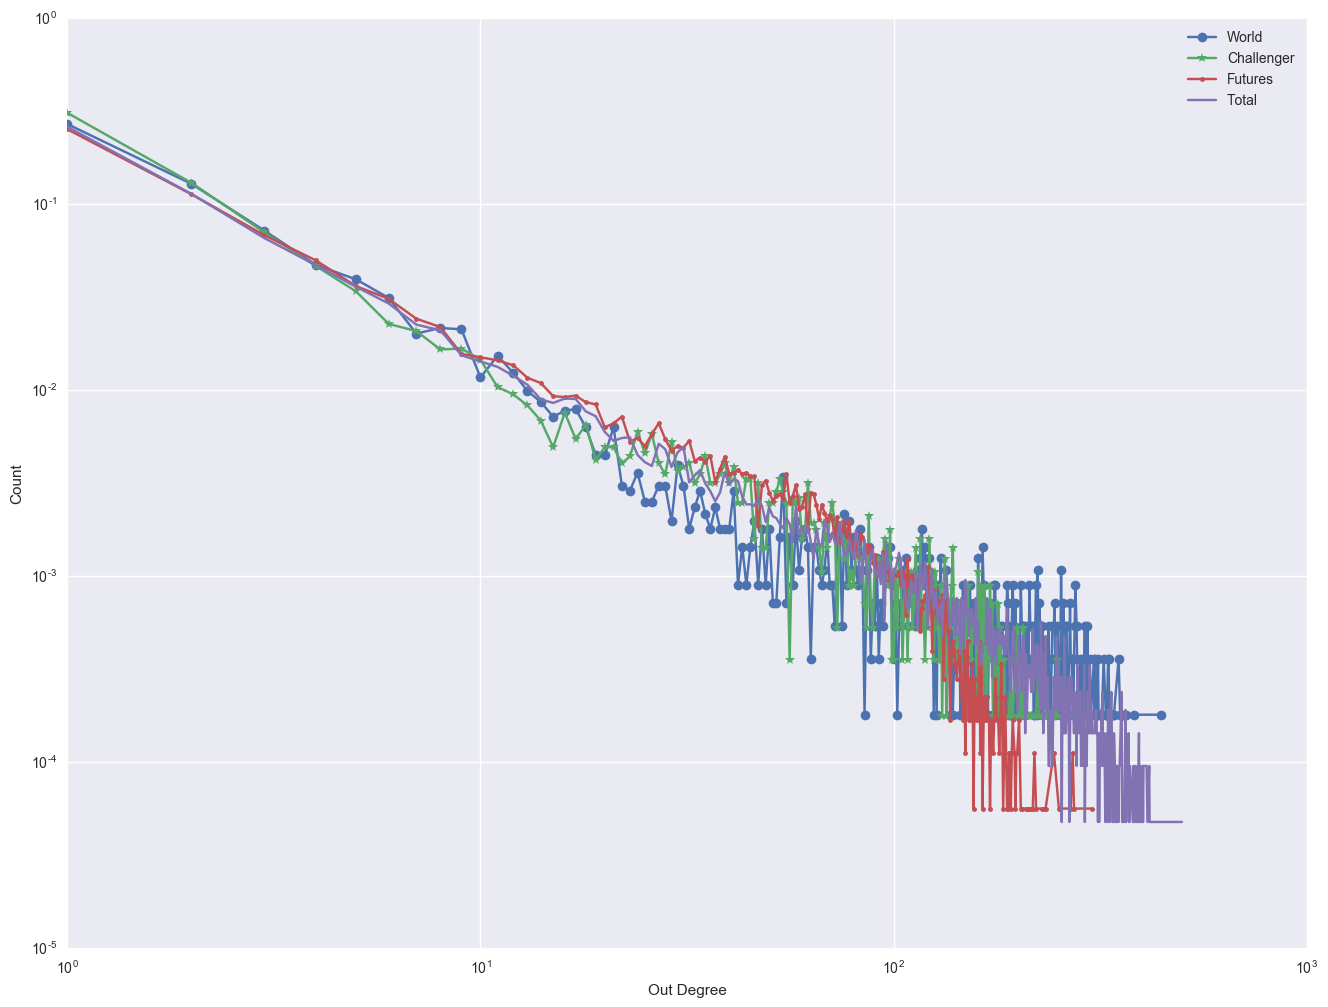

In [132]:
atp_deg_counts, atp_degs, atp_cdf, atp_ccdf, atp_pdf = utils.get_out_dists(atp_directed_graph)
qual_deg_counts, qual_degs, qual_cdf, qual_ccdf, qual_pdf = utils.get_out_dists(qual_directed_graph)
futures_deg_counts, futures_degs, futures_cdf, futures_ccdf, futures_pdf = utils.get_out_dists(futures_directed_graph)
total_deg_counts, total_degs, total_cdf, total_ccdf, total_pdf = utils.get_out_dists(total_directed_graph)

fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)
ax.plot(atp_degs, atp_pdf, marker='o')
ax.plot(qual_degs, qual_pdf, marker='*')
ax.plot(futures_degs, futures_pdf, marker='.')
ax.plot(total_degs, total_pdf)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel('Count')
ax.set_xlabel('Out Degree')
ax.legend(['World', 'Challenger', 'Futures', 'Total'])
plt.show()

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


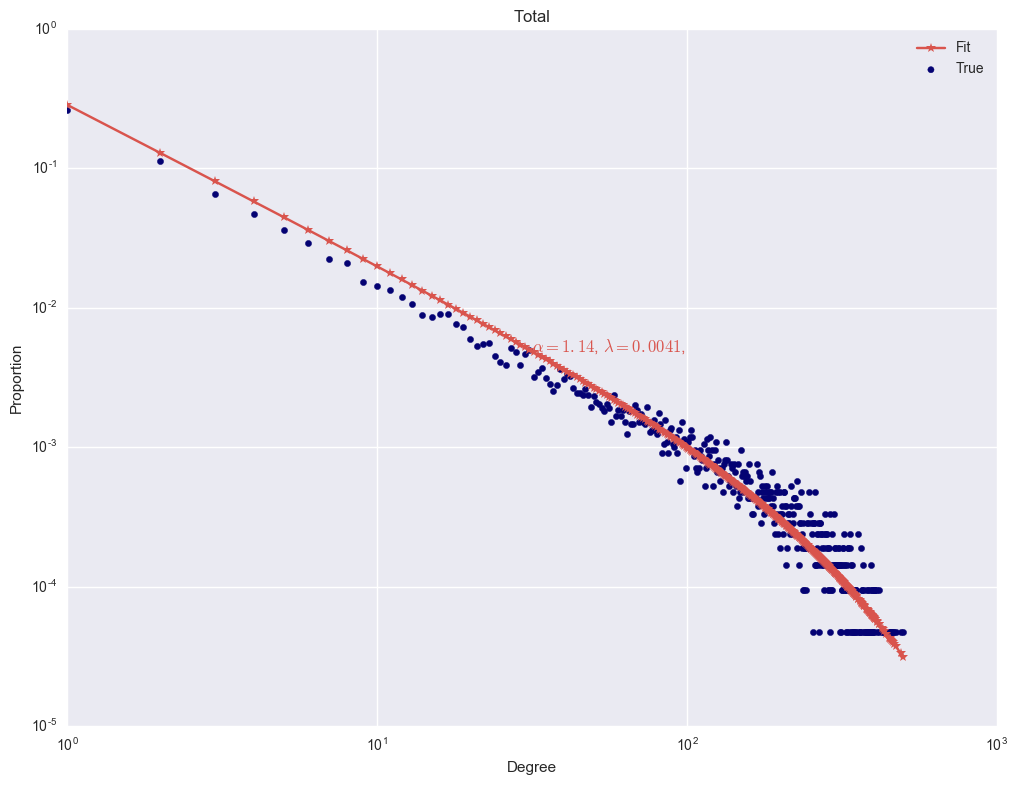

In [82]:
total_deg_counts, total_degs, total_cdf, total_ccdf, total_pdf = utils.get_out_dists(total_directed_graph)
out_deg_data = utils.get_out_deg_data(total_directed_graph)
test_alpha, test_lambda, test_xmin,_ = utils.fit_truncated(out_deg_data)
utils.plot_fit(test_alpha, test_lambda, test_xmin, total_pdf, total_ccdf, total_degs, title="Total")

In [81]:
reload(utils)

<module 'utils' from 'utils.py'>

In [29]:
total_directed_ranks = utils.get_page_ranks(total_directed_graph, names_df)
atp_directed_ranks = utils.get_page_ranks(atp_directed_graph, names_df)
quals_directed_ranks = utils.get_page_ranks(qual_directed_graph, names_df)
f_directed_ranks = utils.get_page_ranks(futures_directed_graph, names_df)

TypeError: get_page_ranks() takes exactly 3 arguments (2 given)

In [12]:
id2names = {}
names2id = {}
for player_id, name in names_df.itertuples(False):
    id2names[player_id] = name
    names2id[name] = player_id



In [13]:
with open("atp_key", "w+") as f:
    for player_id, name in names_df.itertuples(False):
        f.write("{},{}\n".format(player_id, name))

In [215]:
reload(utils)

<module 'utils' from 'utils.py'>

In [33]:
cumulative_ranks_by_year = utils.cumulative_year_page_rank(df, id2names)
ranks_2015 = sorted(list(cumulative_ranks_by_year[2015].iteritems()), key=lambda x : x[1], reverse=True)
players = [x[0] for x in ranks_2015]

In [32]:
top_10 = players[:10]
midrange_10 = random.sample(players[100:200], 10)
lowrange_10 = random.sample(players[500:600], 10)

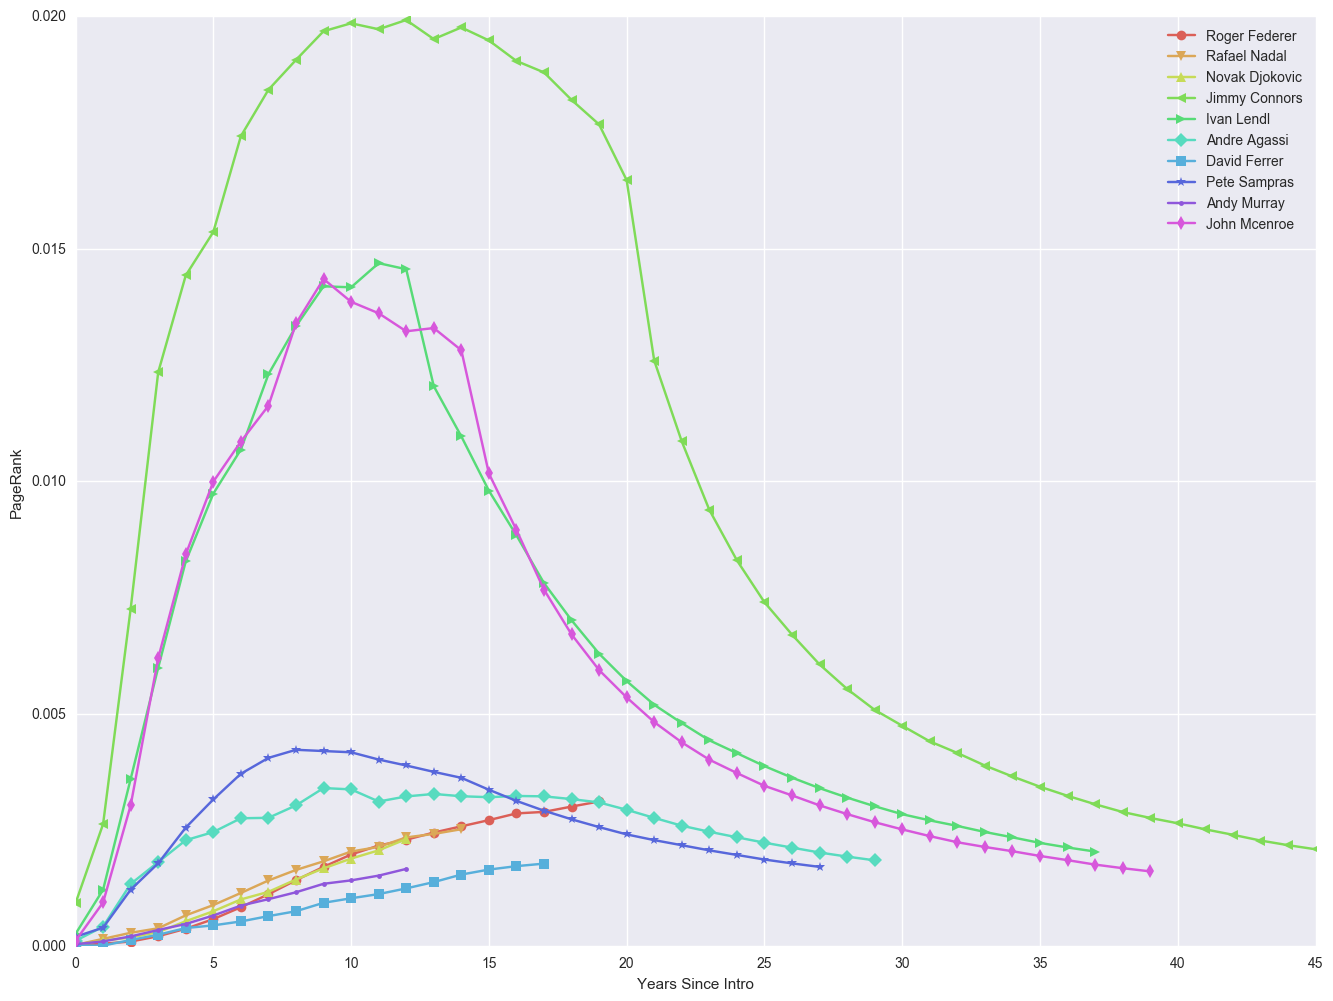

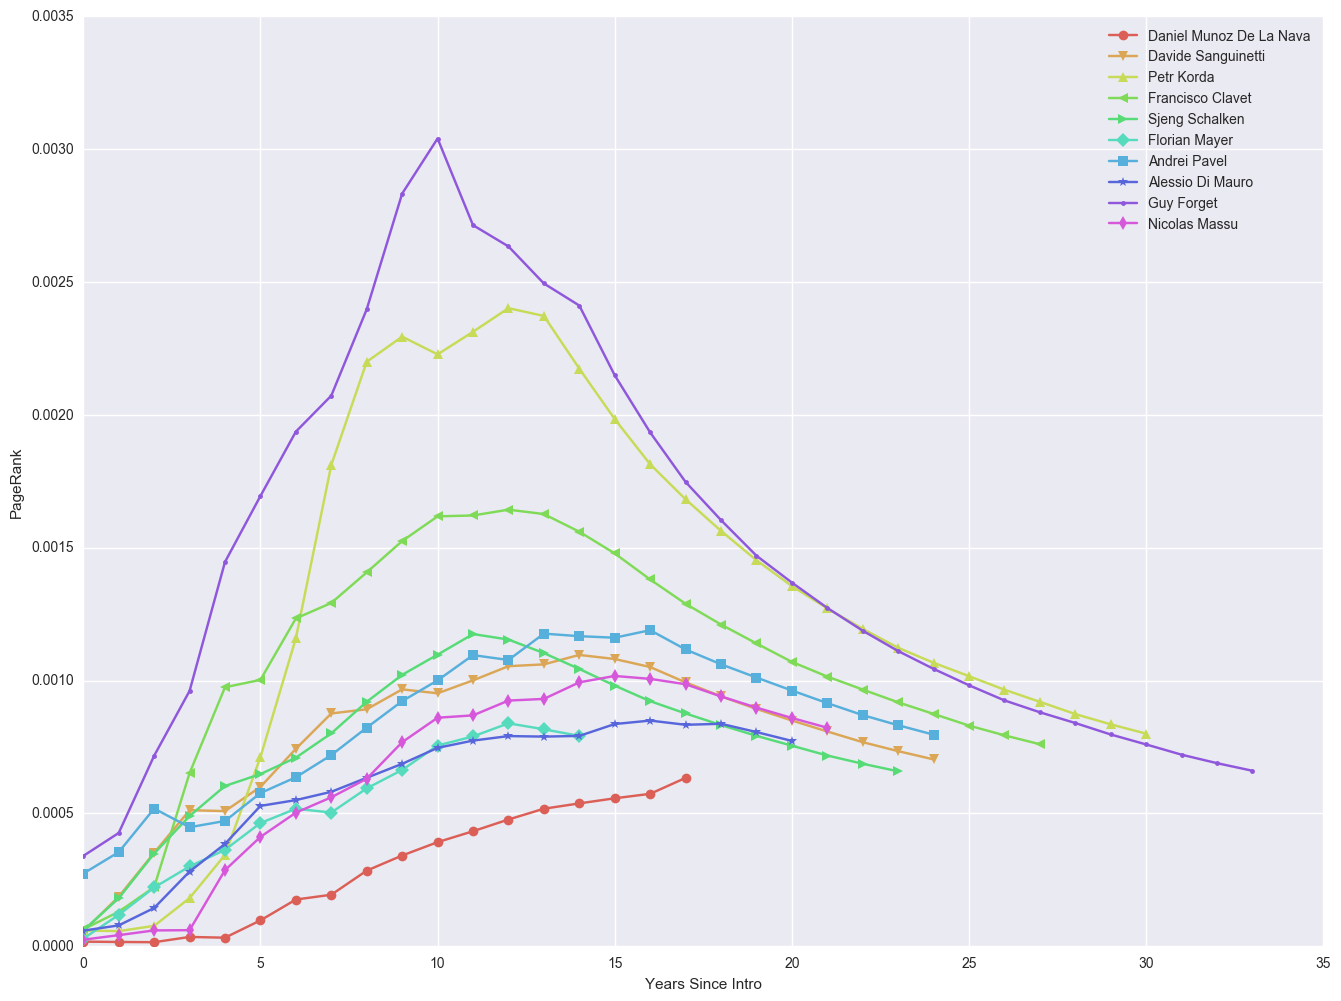

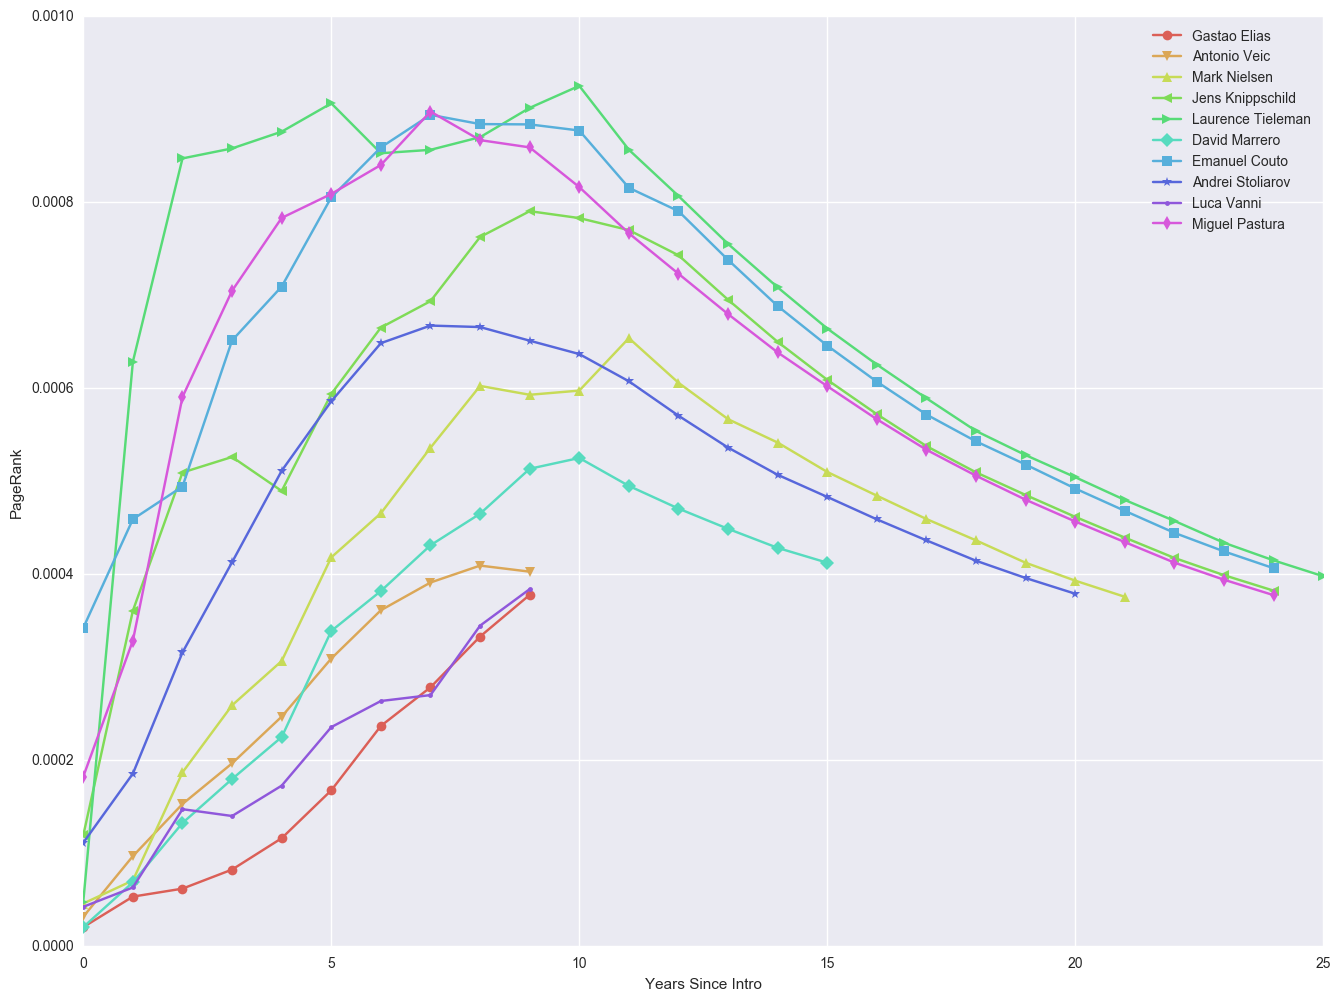

In [235]:
sns.set_palette(sns.color_palette("hls", 11))
markers = itertools.cycle('ov^<>Ds*.d')
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)
for player, marker in zip(top_10, markers):
    ax.plot(utils.get_player_ranks(player, names2id, cumulative_ranks_by_year)[0], label=player, marker=marker)
ax.set_ylabel('PageRank')
ax.set_xlabel('Years Since Intro')
ax.legend()
plt.show()

fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)
for player, marker in zip(midrange_10, markers):
    ax.plot(utils.get_player_ranks(player, names2id, cumulative_ranks_by_year)[0], label=player, marker=marker)
ax.set_ylabel('PageRank')
ax.set_xlabel('Years Since Intro')
ax.legend()
plt.show()

fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)
for player, marker in zip(lowrange_10, markers):
    ax.plot(utils.get_player_ranks(player, names2id, cumulative_ranks_by_year)[0], label=player, marker=marker)
ax.set_ylabel('PageRank')
ax.set_xlabel('Years Since Intro')
ax.legend()
plt.show()

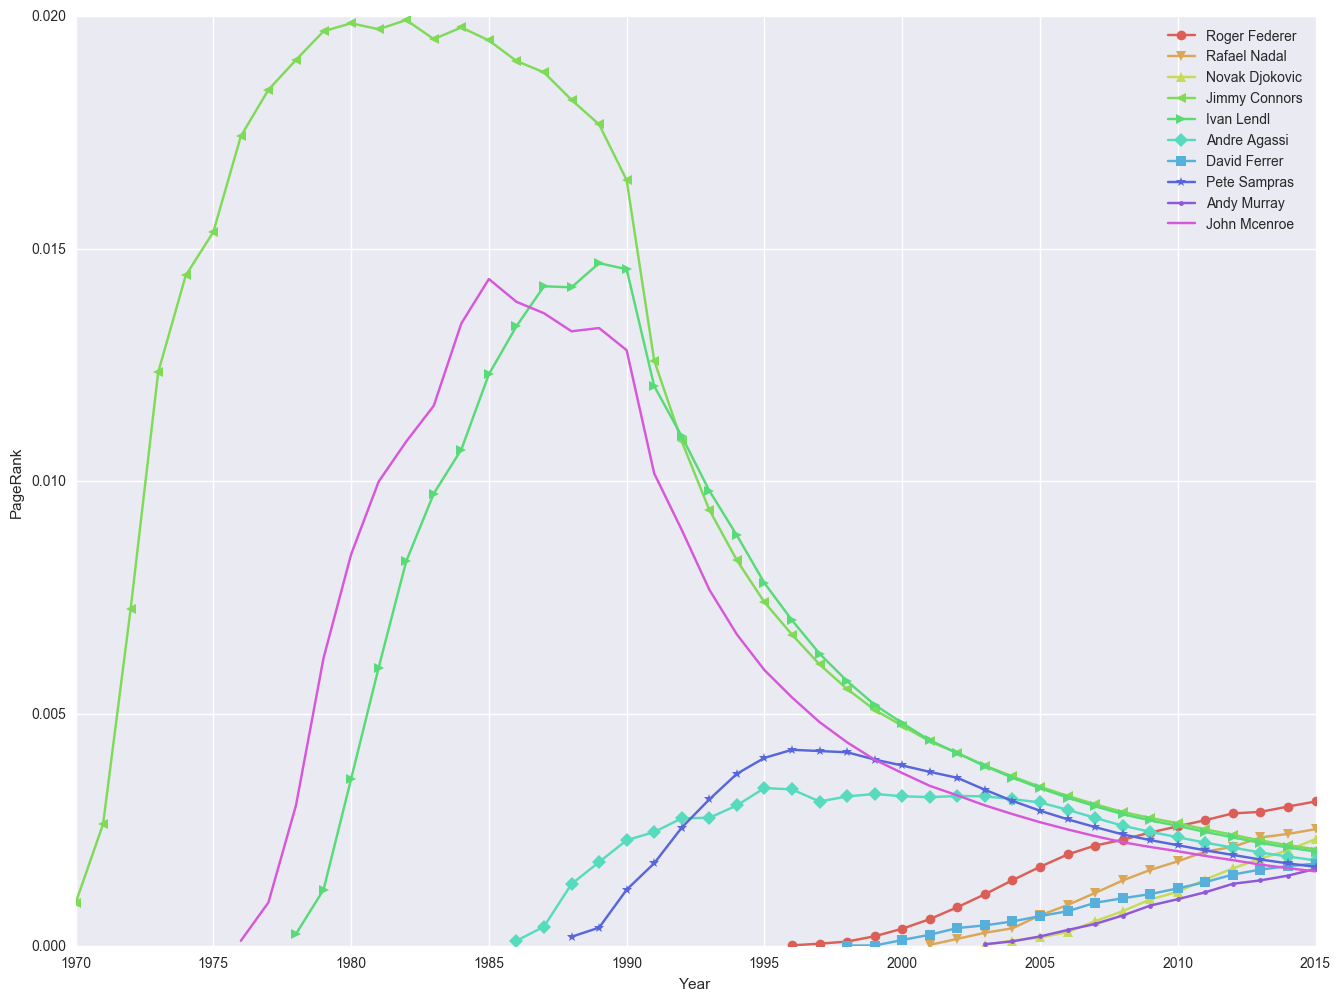

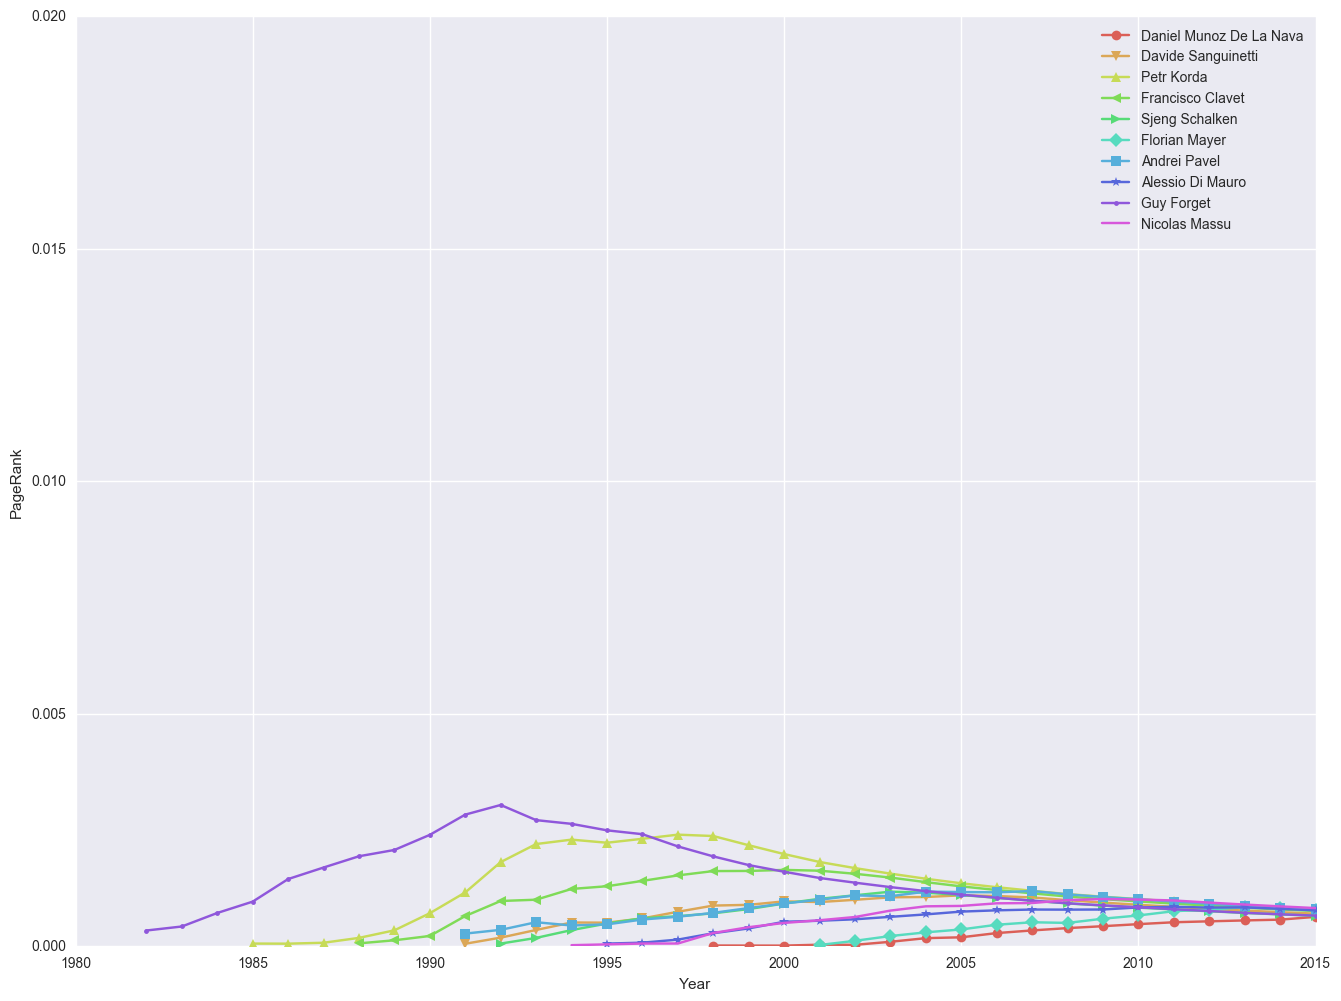

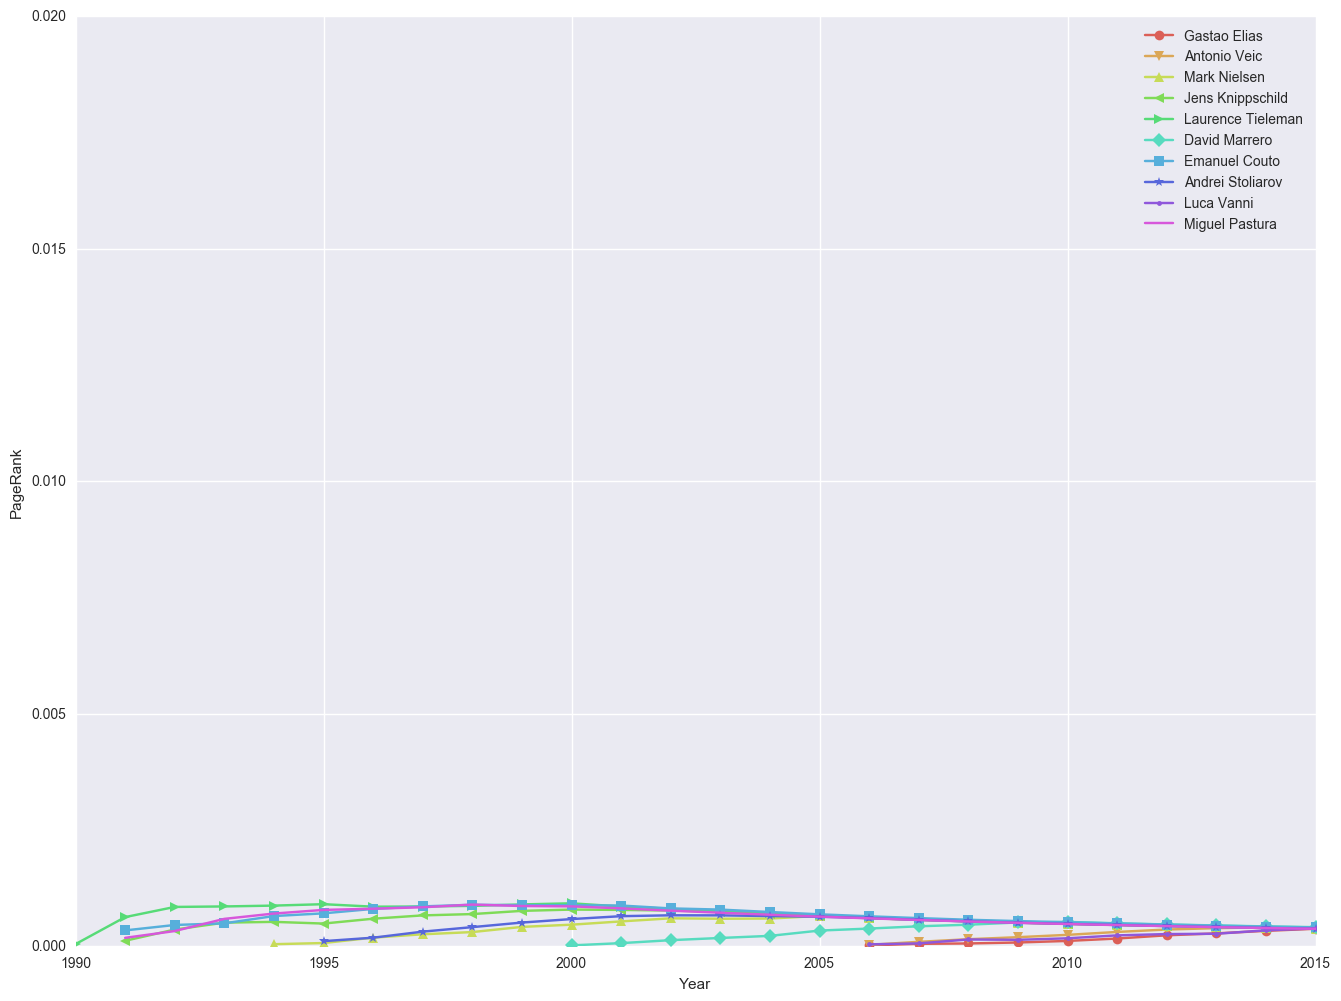

In [236]:
markers = itertools.cycle('ov^<>Ds*.x')
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)
for player, marker in zip(top_10, markers):
    ranks, years = utils.get_player_ranks(player, names2id, cumulative_ranks_by_year)
    ax.plot(years, ranks, label=player, marker=marker)
ax.set_ylabel('PageRank')
ax.set_ylim([0,0.02])
ax.set_xlabel('Year')
ax.legend()
plt.show()

fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)
for player, marker in zip(midrange_10, markers):
    ranks, years = utils.get_player_ranks(player, names2id, cumulative_ranks_by_year)
    ax.plot(years, ranks, label=player, marker=marker)
ax.set_ylabel('PageRank')
ax.set_ylim([0,0.02])
ax.set_xlabel('Year')
ax.legend()
plt.show()

fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)
for player, marker in zip(lowrange_10, markers):
    ranks, years = utils.get_player_ranks(player, names2id, cumulative_ranks_by_year)
    ax.plot(years, ranks, label=player, marker=marker)
ax.set_ylabel('PageRank')
ax.set_ylim([0,0.02])
ax.set_xlabel('Year')
ax.legend()
plt.show()

In [34]:
single_year_ranks = utils.single_year_page_rank(df, id2names)
individual_ranks_2015 = sorted(list(single_year_ranks[2015].iteritems()), key=lambda x : x[1], reverse=True)
individual_players = [x[0] for x in individual_ranks_2015]

In [222]:
top_10_individual = individual_players[:10]
midrange_10_individual = random.sample(individual_players[100:200], 10)
lowrange_10_individual = random.sample(individual_players[500:600], 10)

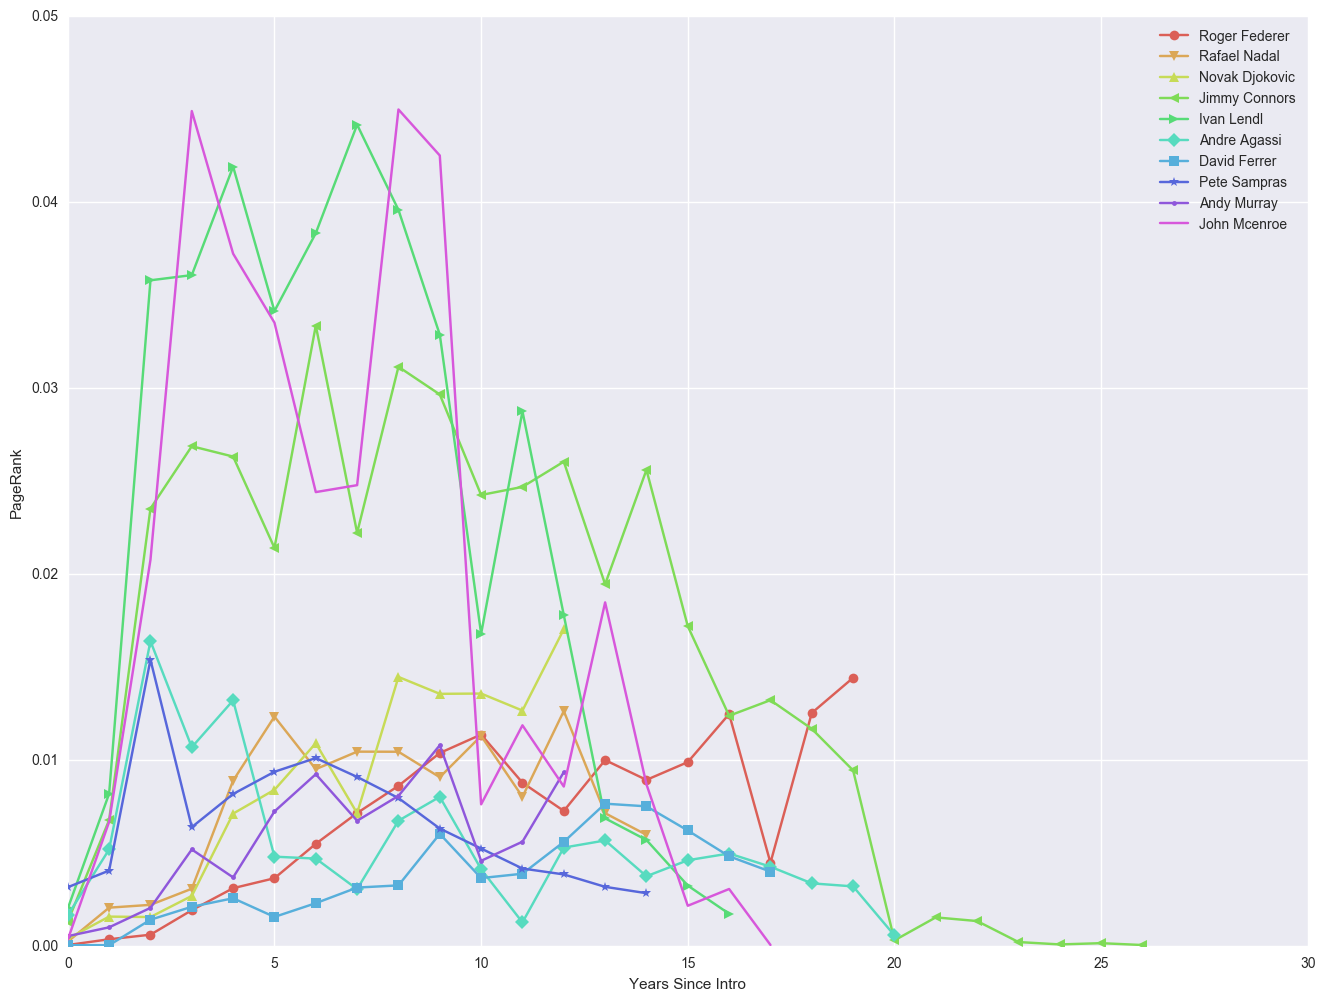

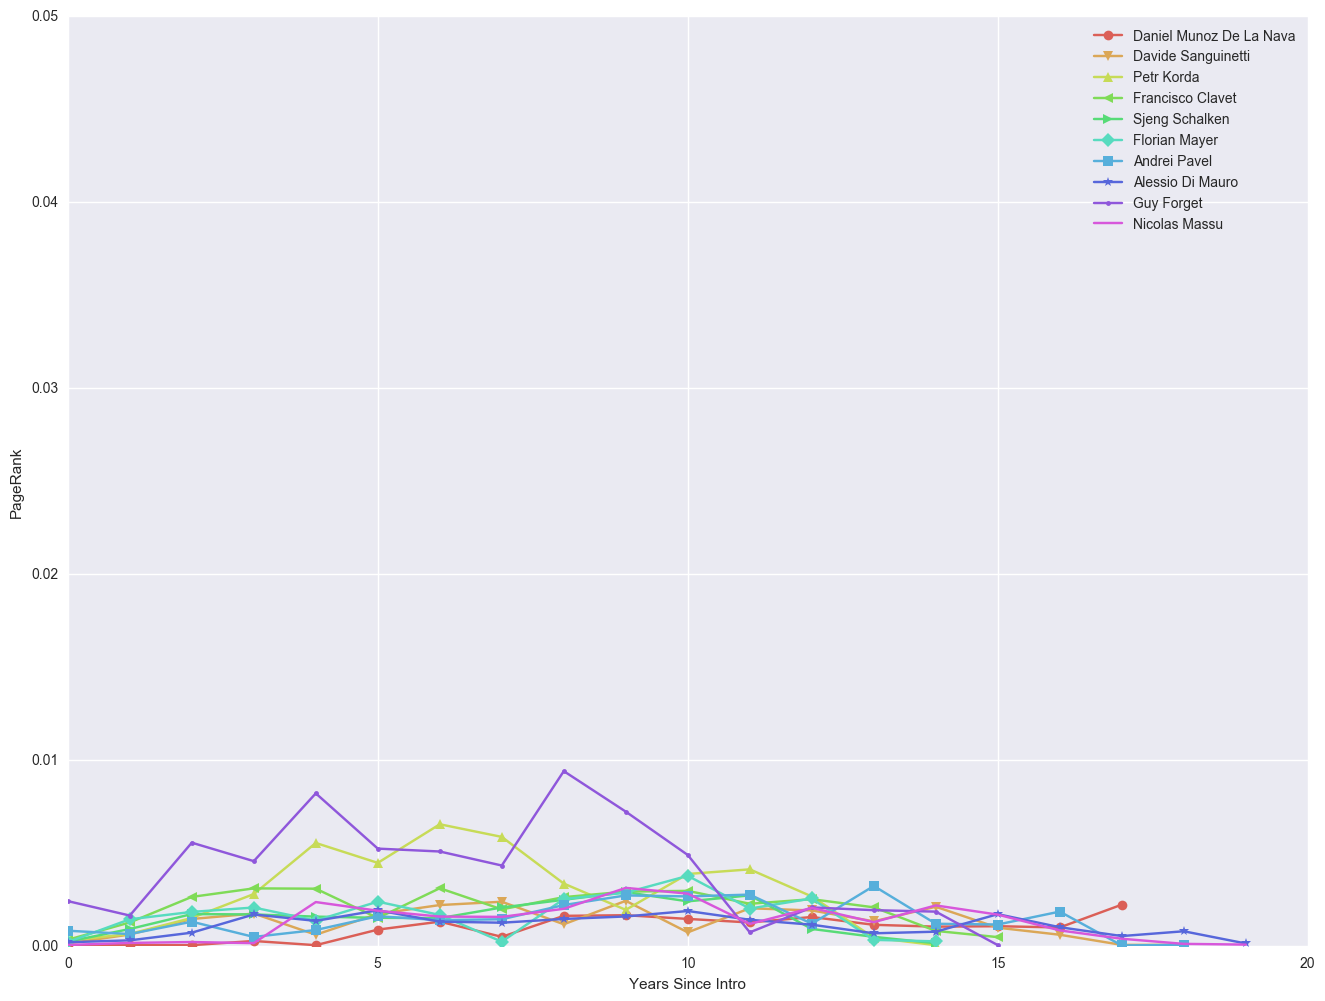

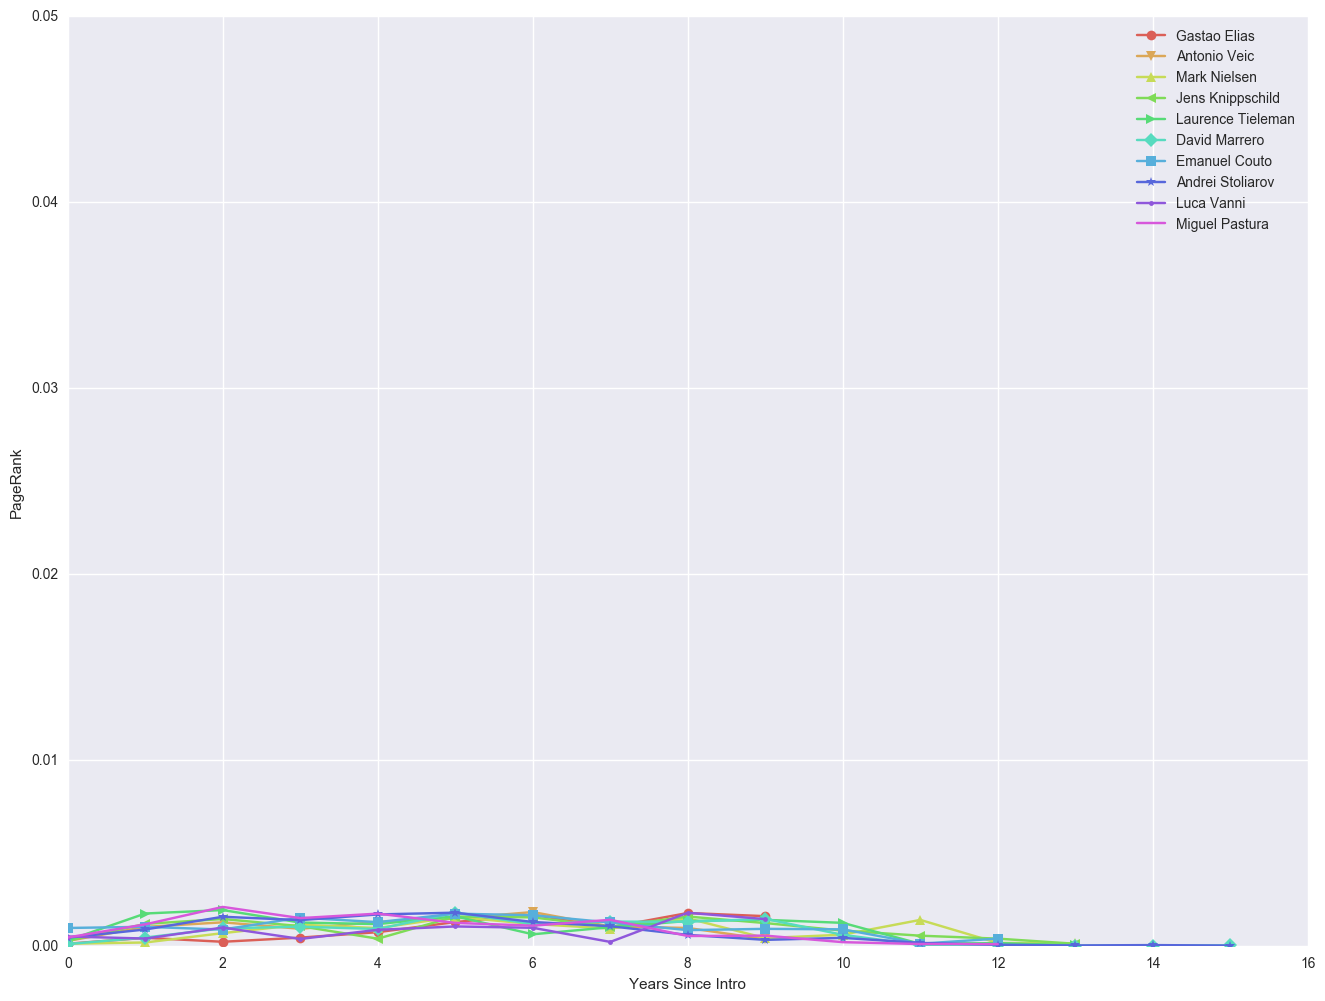

In [237]:
markers = itertools.cycle('ov^<>Ds*.x')
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)
for player, marker in zip(top_10, markers):
    ax.plot(utils.get_player_ranks(player, names2id, single_year_ranks)[0], label=player, marker=marker)
ax.set_ylabel('PageRank')
ax.set_ylim([0,0.05])
ax.set_xlabel('Years Since Intro')
ax.legend()
plt.show()

fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)
for player, marker in zip(midrange_10, markers):
    ax.plot(utils.get_player_ranks(player, names2id, single_year_ranks)[0], label=player, marker=marker)
ax.set_ylabel('PageRank')
ax.set_ylim([0,0.05])
ax.set_xlabel('Years Since Intro')
ax.legend()
plt.show()

fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)
for player, marker in zip(lowrange_10, markers):
    ax.plot(utils.get_player_ranks(player, names2id, single_year_ranks)[0], label=player, marker=marker)
ax.set_ylabel('PageRank')
ax.set_ylim([0,0.05])
ax.set_xlabel('Years Since Intro')
ax.legend()
plt.show()

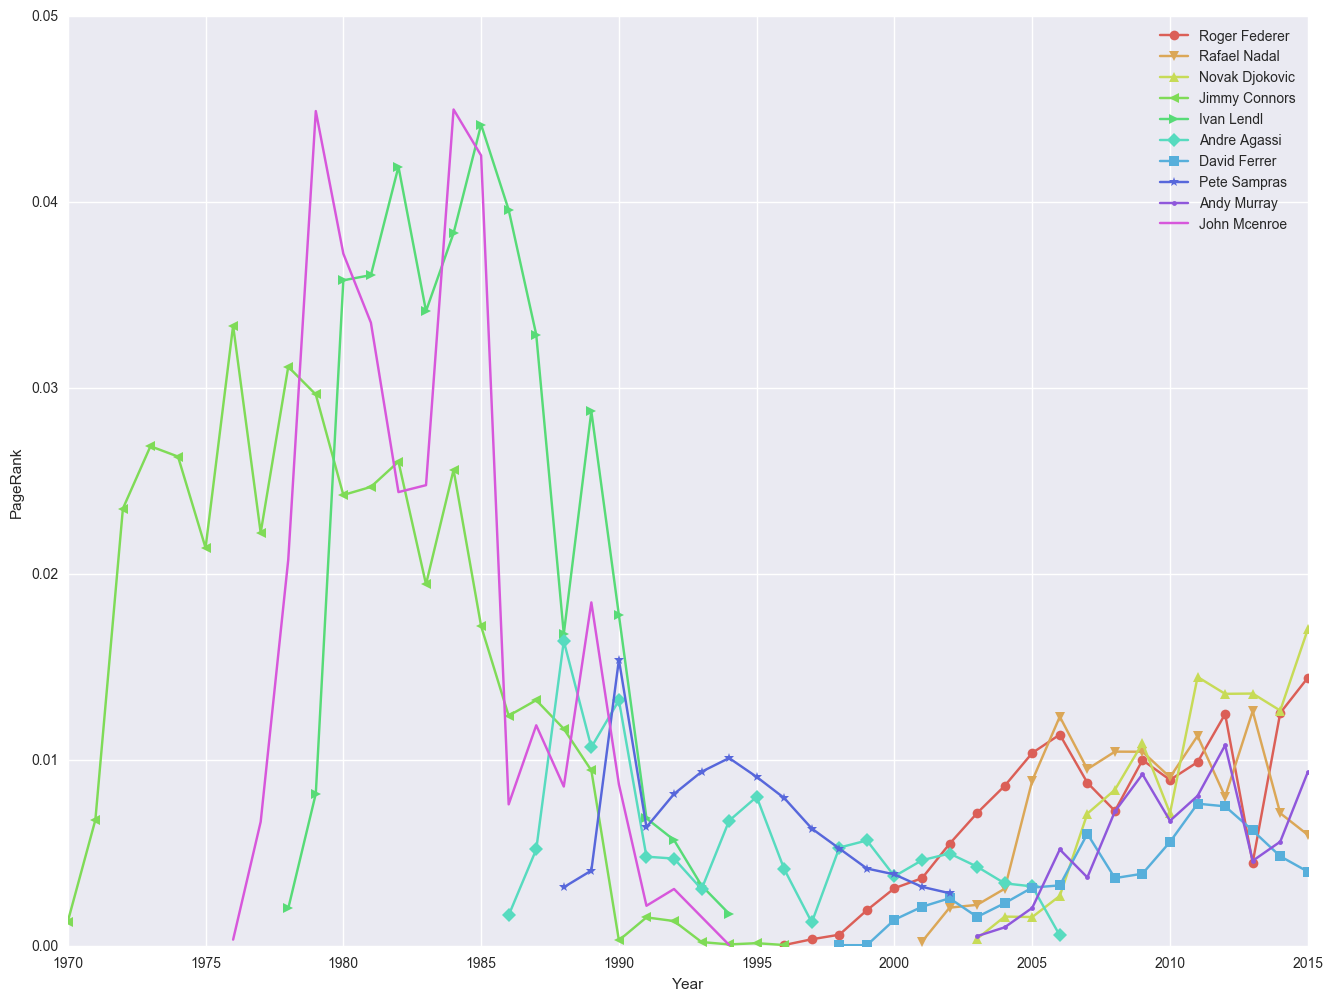

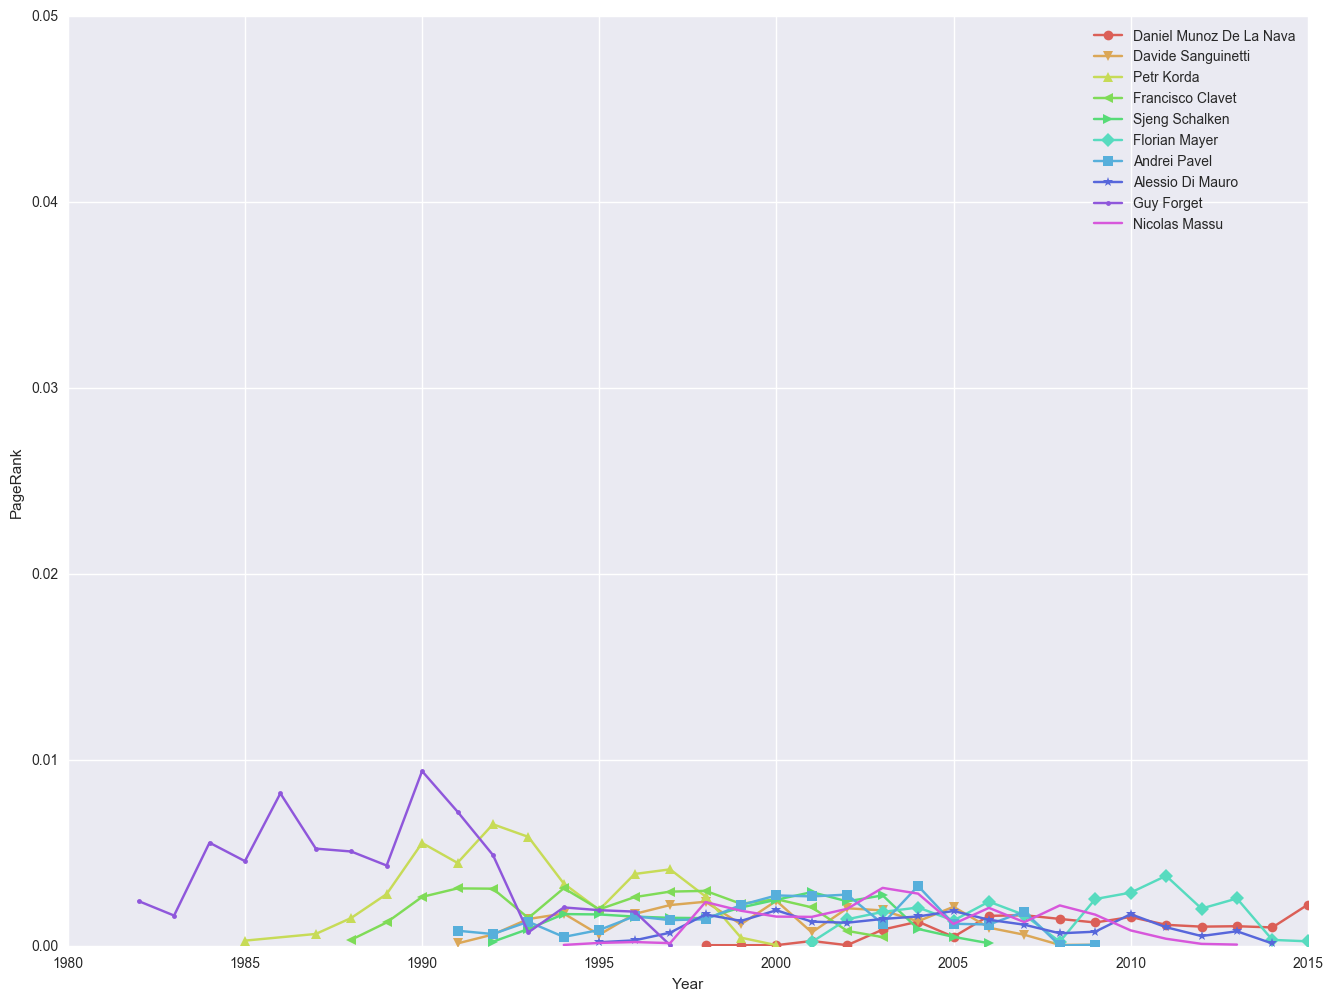

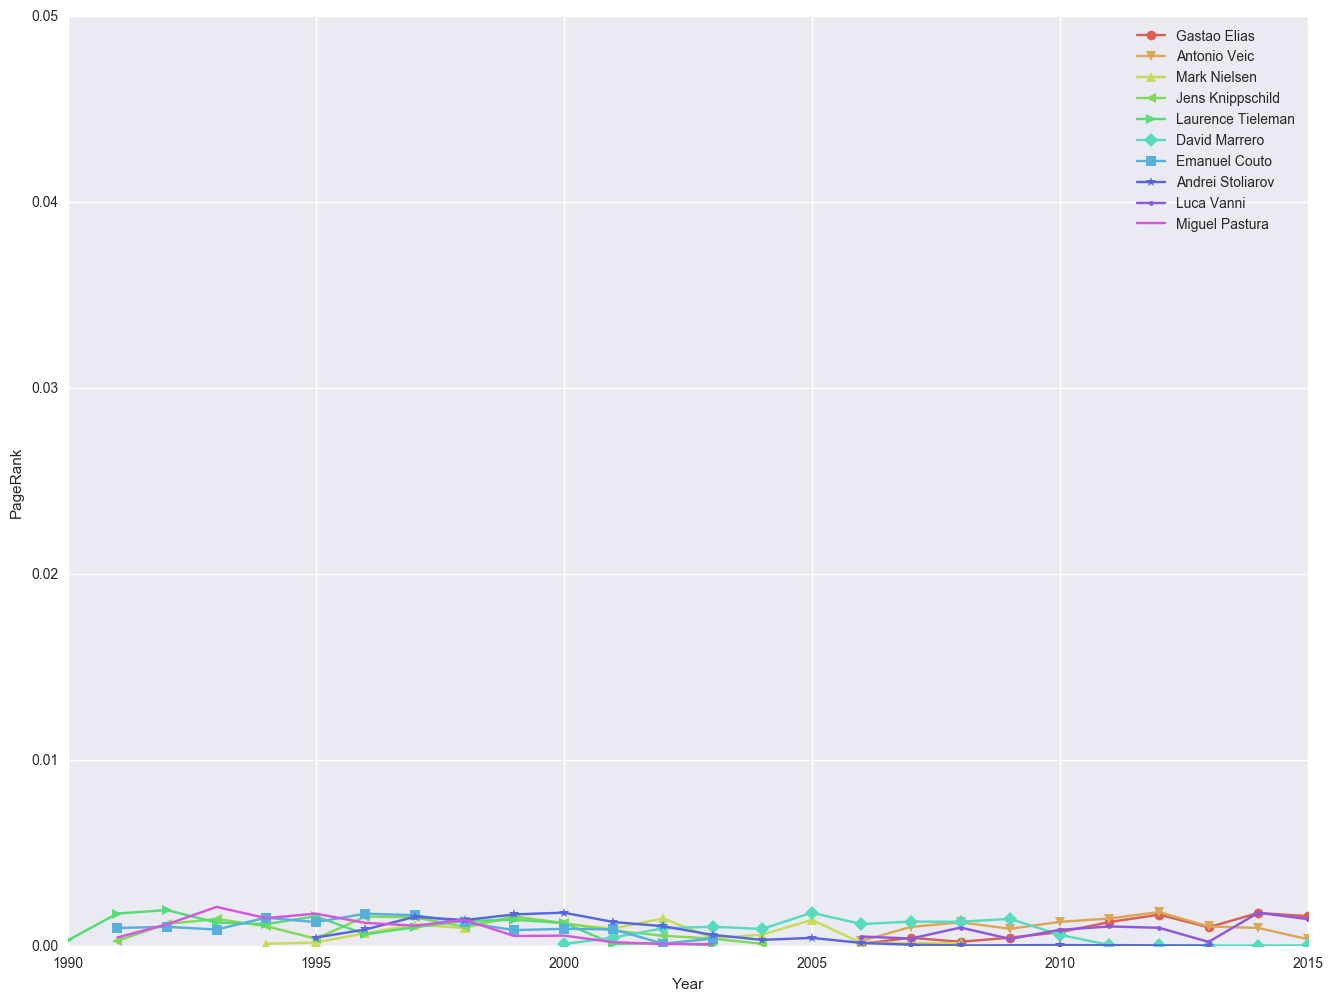

In [238]:
markers = itertools.cycle('ov^<>Ds*.x')
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)
for player, marker in zip(top_10, markers):
    ranks, years = utils.get_player_ranks(player, names2id, single_year_ranks)
    ax.plot(years, ranks, label=player, marker=marker)
ax.set_ylabel('PageRank')
ax.set_ylim([0,0.05])
ax.set_xlabel('Year')
ax.legend()
plt.show()

fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)
for player, marker in zip(midrange_10, markers):
    ranks, years = utils.get_player_ranks(player, names2id, single_year_ranks)
    ax.plot(years, ranks, label=player, marker=marker)
ax.set_ylabel('PageRank')
ax.set_ylim([0,0.05])
ax.set_xlabel('Year')
ax.legend()
plt.show()

fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)
for player, marker in zip(lowrange_10, markers):
    ranks, years = utils.get_player_ranks(player, names2id, single_year_ranks)
    ax.plot(years, ranks, label=player, marker=marker)
ax.set_ylabel('PageRank')
ax.set_ylim([0,0.05])
ax.set_xlabel('Year')
ax.legend()
plt.show()

In [86]:
plot_map = snap.TIntStrH()
for p_id, p_name in names_df.itertuples(False):
    plot_map[p_id] = p_name

In [88]:
snap.DrawGViz(tempG, snap.gvlNeato, "test.png", "test graph", plot_map)

In [92]:
df.dtypes

tourney_id                    object
tourney_name                  object
surface                       object
draw_size                    float64
tourney_level                 object
tourney_date          datetime64[ns]
match_num                      int64
winner_id                      int64
winner_seed                  float64
winner_entry                  object
winner_name                   object
winner_hand                   object
winner_ht                    float64
winner_ioc                    object
winner_age                   float64
winner_rank                  float64
winner_rank_points           float64
loser_id                       int64
loser_seed                   float64
loser_entry                   object
loser_name                    object
loser_hand                    object
loser_ht                     float64
loser_ioc                     object
loser_age                    float64
loser_rank                   float64
loser_rank_points            float64
s

In [35]:
import csv
        

In [75]:
df["year"]

0         1968
1         1968
2         1968
3         1968
4         1968
5         1968
6         1968
7         1968
8         1968
9         1968
10        1968
11        1968
12        1968
13        1968
14        1968
15        1968
16        1968
17        1968
18        1968
19        1968
20        1968
21        1968
22        1968
23        1968
24        1968
25        1968
26        1968
27        1968
28        1968
29        1968
          ... 
634440    2015
634441    2015
634442    2015
634443    2015
634444    2015
634445    2015
634446    2015
634447    2015
634448    2015
634449    2015
634450    2015
634451    2015
634452    2015
634453    2015
634454    2015
634455    2015
634456    2015
634457    2015
634458    2015
634459    2015
634460    2015
634461    2015
634462    2015
634463    2015
634464    2015
634465    2015
634466    2015
634467    2015
634468    2015
634469    2015
Name: year, dtype: int64

In [80]:
yr = 1968
with open("{}_mens_graph.csv".format(yr), "w+") as f:
    f.write("Source,Target\n")
    for _, row in df[df['year']==yr].iterrows():
        if len(row['loser_name']) > 0 and len(row['winner_name']) > 0:
            f.write("{},{}\n".format(row['loser_name'], row['winner_name']))

In [81]:
yr = 2015
with open("{}_mens_graph.csv".format(yr), "w+") as f:
    f.write("Source,Target\n")
    for _, row in df[df['year']==yr].iterrows():
        if len(row['loser_name']) > 0 and len(row['winner_name']) > 0:
            f.write("{},{}\n".format(row['loser_name'], row['winner_name']))

In [ ]:
with open("mens_graph.csv", "w+") as f:
    wr = csv.writer(f, delimiter=",")
    for _, row in df.iterrows():
        wr.writerow([row['loser_name'], row['winner_name']])

In [46]:
with open("mens_graph_new.csv", "w+") as f_new:
    with open("mens_graph.csv", "r") as f:
        for line in f:
            f_new.write(line.replace("\r\n","\n"))

In [86]:
id2names.keys()

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [106]:
def mod_cumulative_year_page_rank(df, id2names):
    years = sorted(df['year'].unique())
    page_ranks = {}
    G = snap.TNEANet.New()
    n = len(id2names.keys())
#     G.AddNode(n)
    for nid in id2names:
        G.AddNode(int(nid))
#         G.AddEdge(n, int(nid))
        
    for year in years:
        cur_ranks = {}
        utils.add_df_to_G(df[df['year'] == year], G, directed=True)
        PRankH = snap.TIntFltH()
        snap.GetPageRank(G, PRankH)
        for id in PRankH:
            if id == n:
                cur_ranks["Dummy"] = PRankH[id]
            else:
                cur_ranks[id2names[id]] = PRankH[id]
        page_ranks[year] = cur_ranks

    return page_ranks

In [107]:
test_ranks = mod_cumulative_year_page_rank(df, id2names)

In [101]:
test_midrange_10

['Andrea Gaudenzi',
 'David Guez',
 'Rik De Voest',
 'Edouard Roger Vasselin',
 'Fernando Vicente',
 'Jose Acasuso',
 'Oscar Hernandez',
 'Igor Andreev',
 'Bjorn Phau',
 'Sjeng Schalken']

In [108]:
test_2015 = sorted(list(test_ranks[2015].iteritems()), key=lambda x : x[1], reverse=True)
test_players = [x[0] for x in test_2015]
test_top_10 = test_players[:10]
test_midrange_10 = random.sample(test_players[100:200], 10)
test_lowrange_10 = random.sample(test_players[500:600], 10)

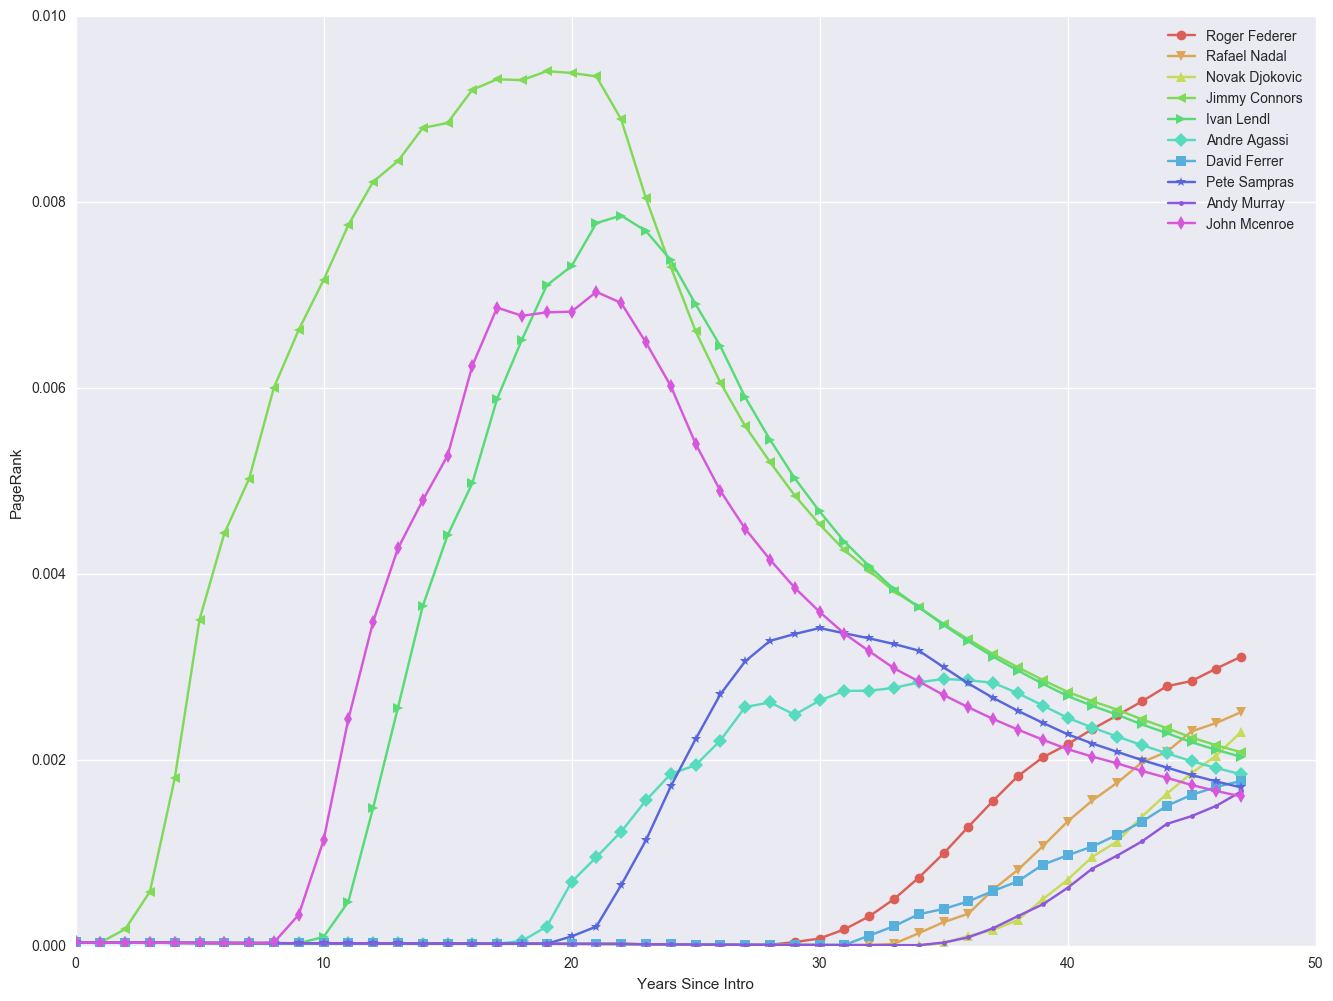

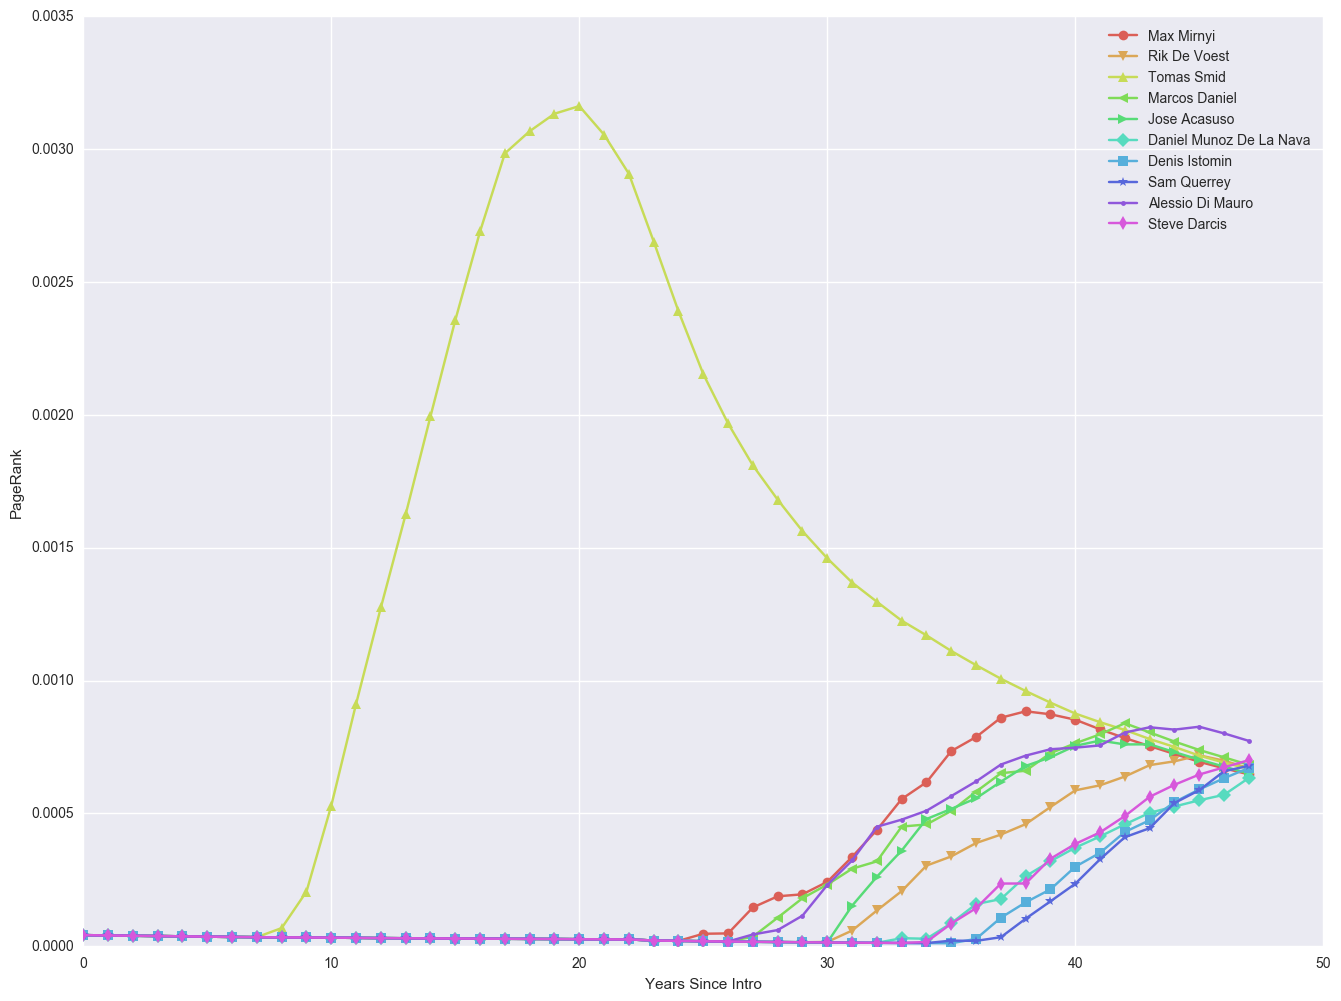

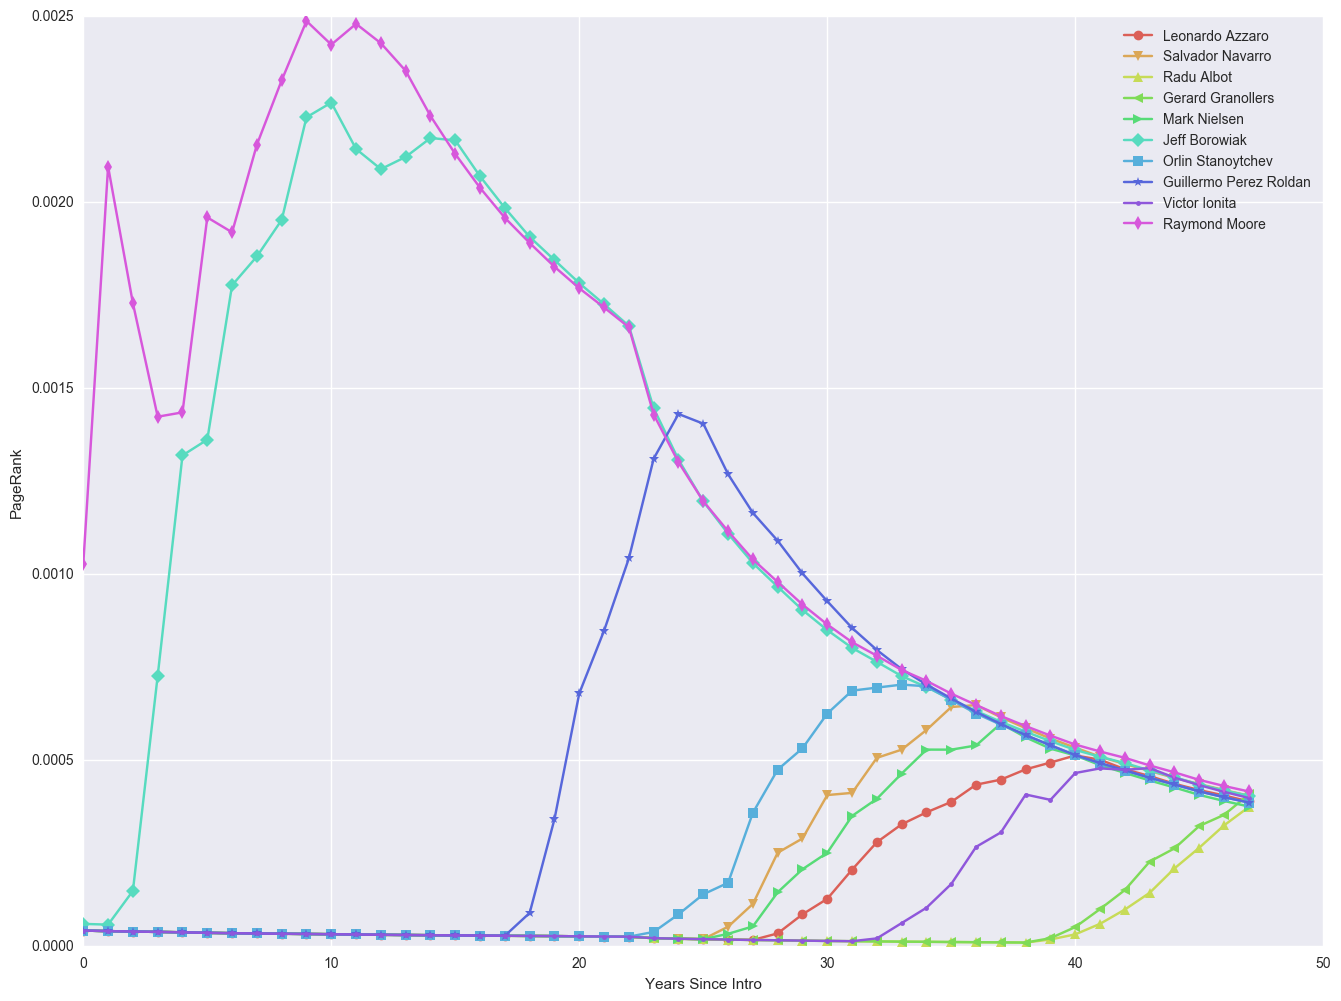

In [104]:
sns.set_palette(sns.color_palette("hls", 11))
markers = itertools.cycle('ov^<>Ds*.d')
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)
for player, marker in zip(test_top_10, markers):
    ax.plot(utils.get_player_ranks(player, names2id, test_ranks)[0], label=player, marker=marker)
ax.set_ylabel('PageRank')
ax.set_xlabel('Years Since Intro')
ax.legend()
plt.show()

fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)
for player, marker in zip(test_midrange_10, markers):
    ax.plot(utils.get_player_ranks(player, names2id, test_ranks)[0], label=player, marker=marker)
ax.set_ylabel('PageRank')
ax.set_xlabel('Years Since Intro')
ax.legend()
plt.show()

fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)
for player, marker in zip(test_lowrange_10, markers):
    ax.plot(utils.get_player_ranks(player, names2id, test_ranks)[0], label=player, marker=marker)
ax.set_ylabel('PageRank')
ax.set_xlabel('Years Since Intro')
ax.legend()
plt.show()

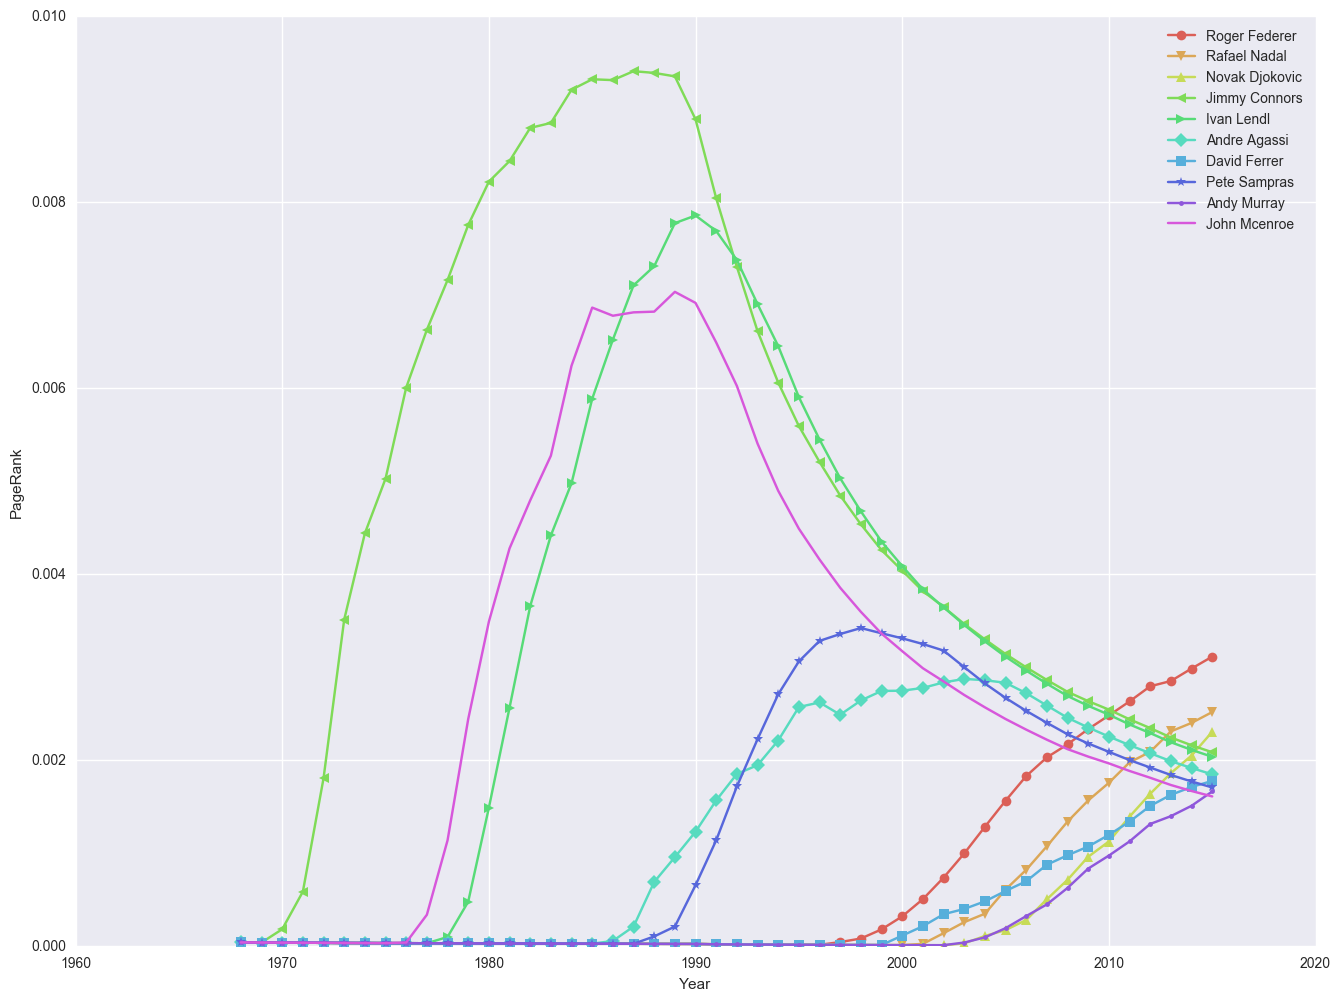

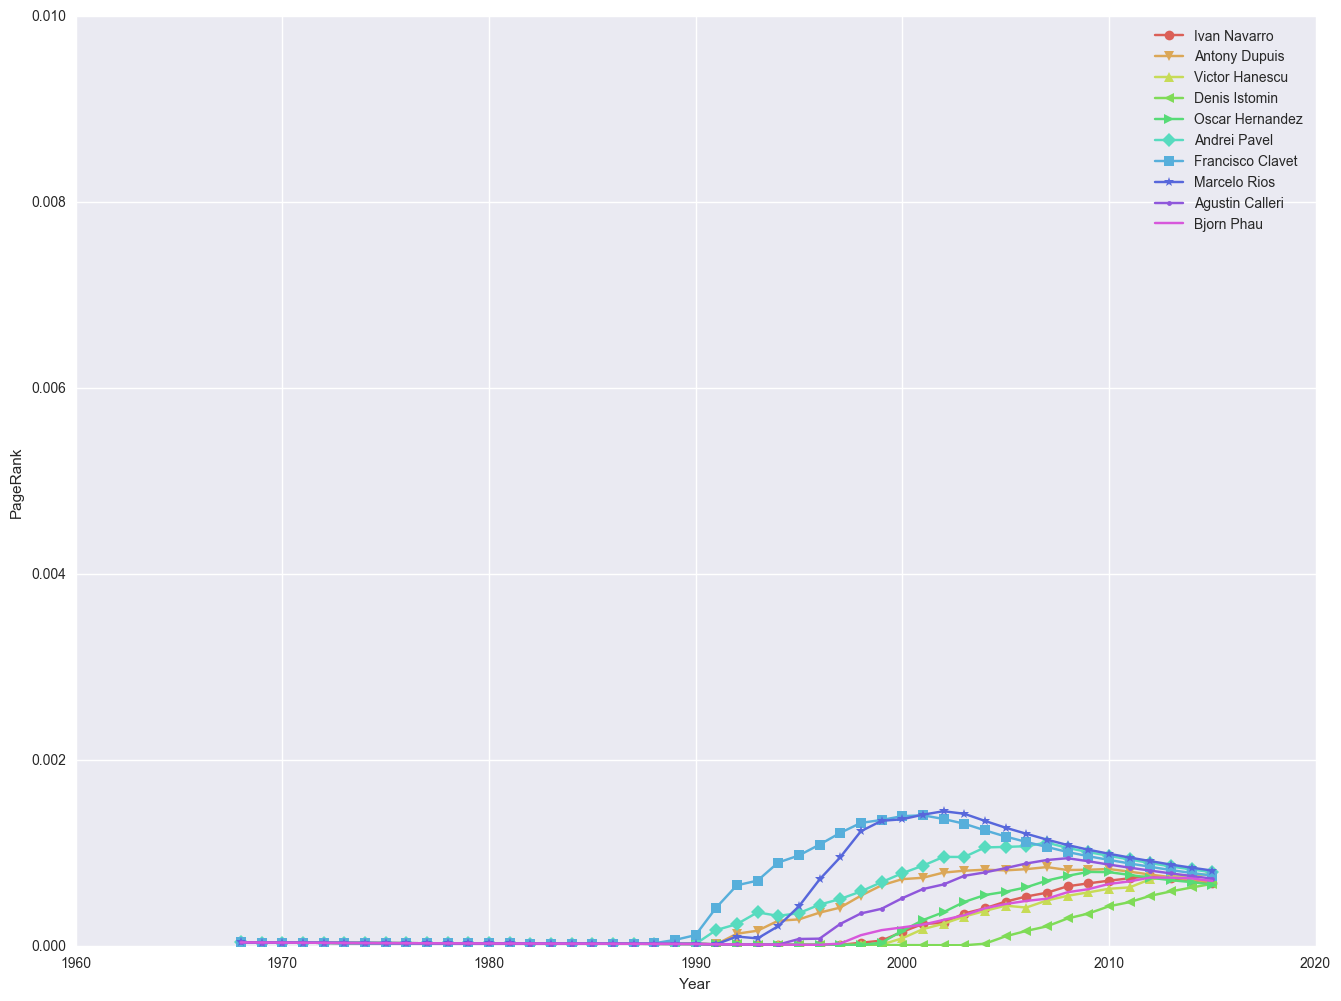

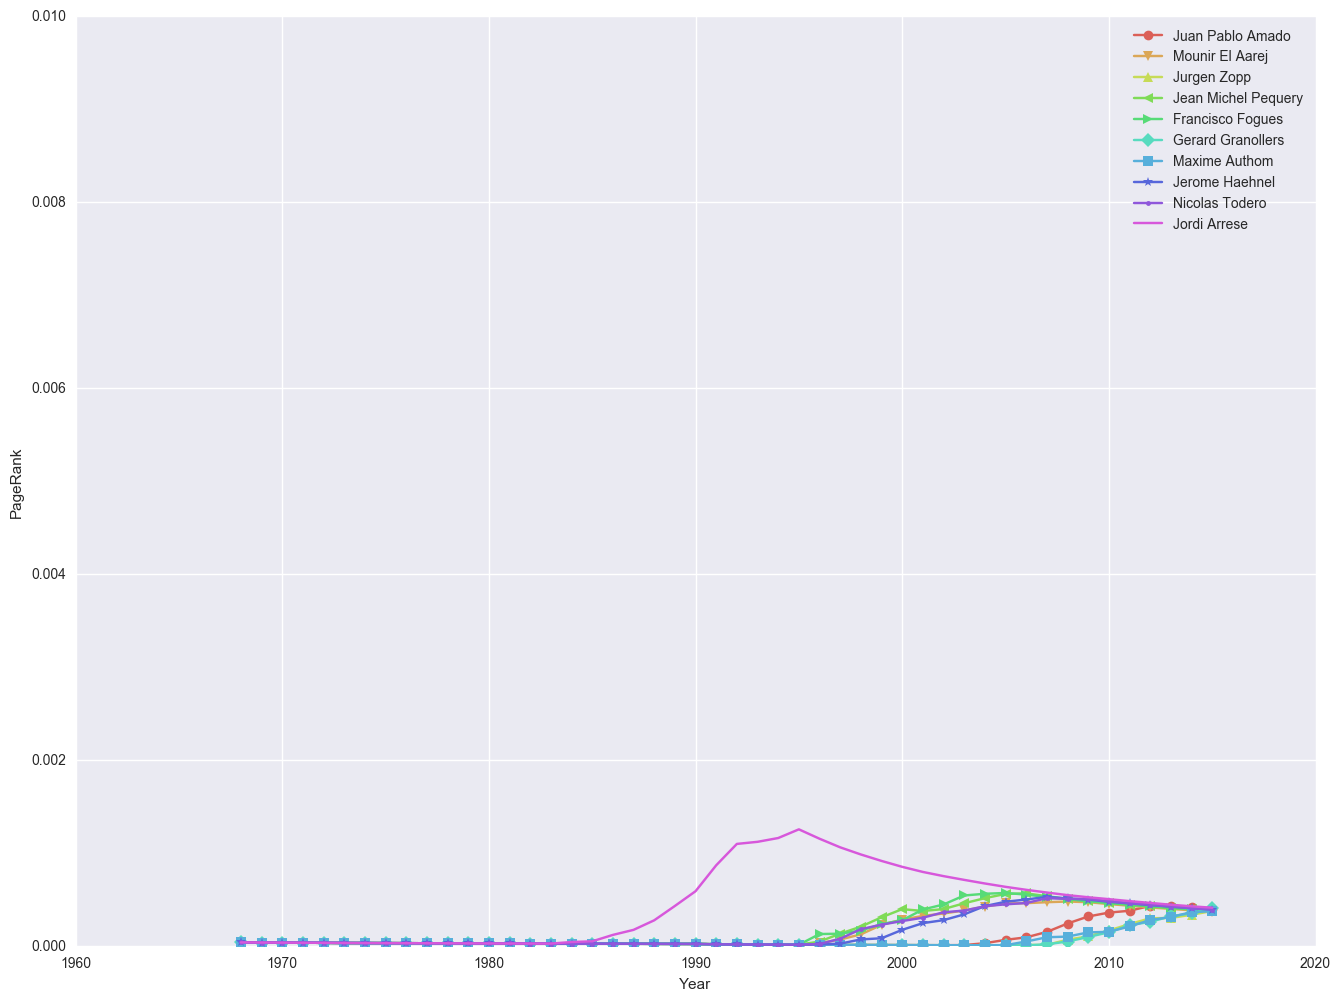

In [74]:
markers = itertools.cycle('ov^<>Ds*.x')
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)
for player, marker in zip(test_top_10, markers):
    ranks, years = utils.get_player_ranks(player, names2id, test_ranks)
    ax.plot(years, ranks, label=player, marker=marker)
ax.set_ylabel('PageRank')
ax.set_ylim([0,0.01])
ax.set_xlabel('Year')
ax.legend()
plt.show()

fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)
for player, marker in zip(test_midrange_10, markers):
    ranks, years = utils.get_player_ranks(player, names2id, test_ranks)
    ax.plot(years, ranks, label=player, marker=marker)
ax.set_ylabel('PageRank')
ax.set_ylim([0,0.01])
ax.set_xlabel('Year')
ax.legend()
plt.show()

fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)
for player, marker in zip(test_lowrange_10, markers):
    ranks, years = utils.get_player_ranks(player, names2id, test_ranks)
    ax.plot(years, ranks, label=player, marker=marker)
ax.set_ylabel('PageRank')
ax.set_ylim([0,0.01])
ax.set_xlabel('Year')
ax.legend()
plt.show()

In [18]:
reload(utils)

<module 'utils' from 'utils.py'>

In [19]:
utils.create_net_file(df, "atp_05-15", 2005, 2015)

True

In [22]:
from collections import defaultdict
atp_counts = defaultdict(int)
challenger_counts = defaultdict(int)
future_counts = defaultdict(int)
for _, row in atp_df[(atp_df['year'] <= 2015) & (atp_df['year'] >= 2005)].iterrows():
    atp_counts[row['winner_name']] += 1
    atp_counts[row['loser_name']] += 1
for _, row in qual_df[(qual_df['year'] <= 2015) & (qual_df['year'] >= 2005)].iterrows():
    challenger_counts[row['winner_name']] += 1
    challenger_counts[row['loser_name']] += 1
for _, row in futures_df[(futures_df['year'] <= 2015) & (futures_df['year'] >= 2005)].iterrows():
    future_counts[row['winner_name']] += 1
    future_counts[row['loser_name']] += 1
    
    

In [46]:
import shutil
from tempfile import NamedTemporaryFile
temp = NamedTemporaryFile(delete=False)

with open('men-05-15.csv', "r") as f, temp:
    reader = csv.reader(f, delimiter=",")
    writer = csv.writer(temp, delimiter=",")
    row = reader.next()
    row.append("atp count")
    row.append("qual count")
    row.append("future count")
    writer.writerow(row)
    for row in reader:
        name = row[1]
        row.append(atp_counts[name])
        row.append(challenger_counts[name])
        row.append(future_counts[name])
        writer.writerow(row)
shutil.move(temp.name, 'men-05-15.csv')
        

In [48]:
temp = NamedTemporaryFile(delete=False)
colors = ["dark green", "brown", "blue", "red", "green", "purple" ]
with open('men-05-15.csv', "r") as f, temp:
    reader = csv.reader(f, delimiter=",")
    writer = csv.writer(temp, delimiter=",")
    row = reader.next()
    row.append("comp color")
    assert(row[9] == "modularity_class")
    writer.writerow(row)
    for row in reader:
        comp = int(row[9])
        row.append(colors[comp])
        writer.writerow(row)
shutil.move(temp.name, 'men-05-15.csv')

In [62]:
community_df = pd.read_csv('men-05-15.csv')
# community_df['atp prop'] = community_df['atp count']/community_df['weighted degree']
# community_df['qual prop'] = community_df['qual count']/community_df['weighted degree']
# community_df['future prop'] = community_df['future count']/community_df['weighted degree']

In [63]:
community_sums = community_df.groupby('comp color').sum()

In [70]:
community_sums['atp prop'] = community_sums['atp count']/community_sums['weighted degree']
community_sums['qual prop'] = community_sums['qual count']/community_sums['weighted degree']
community_sums['future prop'] = community_sums['future count']/community_sums['weighted degree']
community_sums['count'] = community_df.groupby('comp color').count()['pageranks']
community_sums

id  timeset  indegree  outdegree  degree  weighted indegree  \
comp color                                                                      
blue        12415667      NaN     28979      33044   62023            33846.0   
brown        8816726      NaN     24744      26980   51724            28364.0   
dark green   6390067      NaN     16741      20882   37623            19091.0   
green       13371642      NaN     33711      37567   71278            41087.0   
purple      18864075      NaN     62736      67718  130454            70117.0   
red          5230168      NaN     73578      54298  127876            99227.0   

            weighted outdegree  weighted degree  modularity_class  pageranks  \
comp color                                                                     
blue                   38611.0          72457.0              4370   0.110332   
brown                  30988.0          59352.0              1510   0.089454   
dark green             23828.0          42919.0                 0   0.057045   
green                  45820.0          86907.0              9420   0.129990   
purple                 76395.0         146512.0             16565   0.204719   
red                    76090.0         175317.0              2703   0.408461   

            componentnumber  strongcompnum  atp count  qual count  \
comp color                                                          
blue                      0        3042657       1802       12633   
brown                     0        2108517        820        7146   
dark green                0        1595328        537        5945   
green                     0        3551301       1369       12116   
purple                    0        4547778       1093       16299   
red                       0        1029591      61941       85613   

            future count  atp prop  qual prop  future prop  count  
comp color                                                         
blue               58022  0.024870   0.174352     0.800778   2185  
brown              51386  0.013816   0.120400     0.865784   1510  
dark green         36437  0.012512   0.138517     0.848971   1145  
green              73422  0.015752   0.139413     0.844834   2355  
purple            129119  0.007460   0.111247     0.881286   3313  
red                27763  0.353309   0.488333     0.158359    901

In [109]:
community_sums = community_sums[['count', 'pageranks', 'atp prop', 'qual prop', 'future prop', 'weighted degree', 'atp count', 'qual count', 'future count' ]]
community_sums

count  pageranks  atp prop  qual prop  future prop  \
comp color                                                       
blue         2185   0.110332  0.024870   0.174352     0.800778   
brown        1510   0.089454  0.013816   0.120400     0.865784   
dark green   1145   0.057045  0.012512   0.138517     0.848971   
green        2355   0.129990  0.015752   0.139413     0.844834   
purple       3313   0.204719  0.007460   0.111247     0.881286   
red           901   0.408461  0.353309   0.488333     0.158359   

            weighted degree  atp count  qual count  future count  
comp color                                                        
blue                72457.0       1802       12633         58022  
brown               59352.0        820        7146         51386  
dark green          42919.0        537        5945         36437  
green               86907.0       1369       12116         73422  
purple             146512.0       1093       16299        129119  
red                175317.0      61941       85613         27763